## Introduction to Data Science

### Exploratory Data Analysis (EDA) with Pandas

In [1]:
import os
import pathlib
import zipfile
import requests

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
pd.options.plotting.backend = 'matplotlib'
#import pandas_profiling

import seaborn as sns

from IPython.display import display, Image
from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = "all"

#pd.set_option('display.max_rows', 500)
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)

%matplotlib inline

# Sources: 
# http://blog.districtdatalabs.com/data-exploration-with-python-1
# https://towardsdatascience.com/a-data-science-workflow-26c3f05a010e
# https://hackernoon.com/fundamental-python-data-science-libraries-a-cheatsheet-part-2-4-fcf5fab9cdf1
# https://github.com/aakashtandel 

In [2]:
datapath = pathlib.Path("../datasets/")

## Components of EDA

+ Understanding your variables
+ Cleaning your dataset
+ Analyzing relationships between variables

## 1st example: Examining datasets and Pandas profiling

read_csv is a pandas function to read csv files and do operations on it later.  
head() method is used to return top n (5 by default) rows of a DataFrame.

In [3]:
df = pd.read_csv('../datasets/CSVs/mobile.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


info() method is used to get a summary of the DataFrame. It is useful when doing exploratory data analysis (EDA) of the data.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

corr() method is used to find the pairwise correlation of all the columns in the DataFrame.  

In [5]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


describe() method computes a summary of statistics like count, mean, standard deviation, min, max and quartile values pertaining to the DataFrame columns.

In [6]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Using Pandas Profiling

In [7]:
#df.profile_report()

## 2nd example: Manipulating Names Dataset

In [8]:
names1880 = pd.read_csv(datapath / 'Names' / 'yob1880.txt', names=['name', 'sex', 'births'])

In [9]:
names1880[0:20]

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [10]:
#names1880.head()
names1880.tail()

,name,sex,births
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5
1999,Zachariah,M,5


In [11]:
names1880.groupby('sex').births.sum()

sex
F     90993
M    110491
Name: births, dtype: int64

In [12]:
years = range(1880, 2020)
pieces = []
columns = ['name', 'sex', 'births']
for year in years:
    path = datapath / 'Names' / 'yob{}.txt'.format(year)
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)
# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [13]:
names[:10]

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [14]:
names.groupby('sex').births.sum()

sex
F    175690160
M    179285222
Name: births, dtype: int64

In [15]:
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)
total_births

sex,F,M
year,,
1880,90993,110491
1881,91955,100746
1882,107850,113687
1883,112322,104630
1884,129022,114445
...,...,...
2015,1781725,1913059
2016,1767902,1893471
2017,1721550,1845472


In [16]:
total_births.tail()

sex,F,M
year,,
2015,1781725,1913059
2016,1767902,1893471
2017,1721550,1845472
2018,1694640,1809166
2019,1665373,1779948


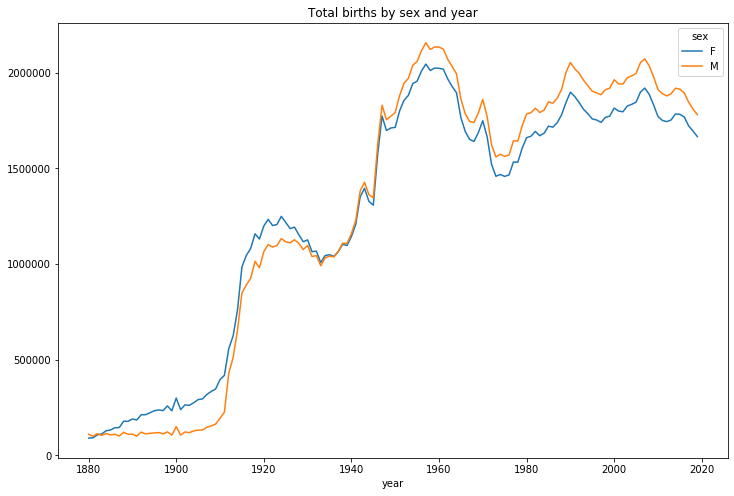

In [17]:
total_births.plot(title='Total births by sex and year', figsize=(12,8))

In [18]:
def add_prop(group):
    # Integer division floors
    births = group.births.astype(float)
    group['percent'] = births / births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [19]:
names[:10]

,name,sex,births,year,percent
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [20]:
names[names.name.str.startswith('Renat')]

,name,sex,births,year,percent
54444,Renata,F,5,1900,0.000017
64071,Renata,F,7,1903,0.000027
78536,Renata,F,7,1907,0.000022
95342,Renata,F,9,1911,0.000022
98383,Renato,M,5,1911,0.000022
...,...,...,...,...,...
1956735,Renata,F,643,2019,0.000386
1960551,Renatta,F,33,2019,0.000020
1963837,Renatha,F,15,2019,0.000009
1968385,Renate,F,8,2019,0.000005


In [21]:
np.allclose(names.groupby(['year', 'sex']).percent.sum(), 1)

True

In [22]:
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

grouped = names.groupby(['year', 'sex'], as_index=False)
top1000 = grouped.apply(get_top1000)

#d = {'year':'mean'}
#df = df.groupby('Name').agg(d).reset_index()
#print (df)

In [23]:
#top1000
pd.options.display.float_format = '{:,.3f}'.format
top1000[:15]

name sex  births  year  percent
0 0        Mary   F    7065  1880    0.078
  1        Anna   F    2604  1880    0.029
  2        Emma   F    2003  1880    0.022
  3   Elizabeth   F    1939  1880    0.021
  4      Minnie   F    1746  1880    0.019
  5    Margaret   F    1578  1880    0.017
  6         Ida   F    1472  1880    0.016
  7       Alice   F    1414  1880    0.016
  8      Bertha   F    1320  1880    0.015
  9       Sarah   F    1288  1880    0.014
  10      Annie   F    1258  1880    0.014
  11      Clara   F    1226  1880    0.013
  12       Ella   F    1156  1880    0.013
  13   Florence   F    1063  1880    0.012
  14       Cora   F    1045  1880    0.011

In [24]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [25]:
Walter_names = boys[boys.name=='Walter']
Walter_names[:10]

,,name,sex,births,year,percent
1,954,Walter,M,1755,1880,0.016
3,2950,Walter,M,1670,1881,0.017
5,4975,Walter,M,1805,1882,0.016
7,7128,Walter,M,1705,1883,0.016
9,9330,Walter,M,1902,1884,0.017
11,11652,Walter,M,1808,1885,0.017
13,14031,Walter,M,1880,1886,0.017
15,16447,Walter,M,1705,1887,0.017
17,18988,Walter,M,2040,1888,0.017
19,21644,Walter,M,1916,1889,0.017


In [26]:
total_births_top1000 = top1000.pivot_table('births', index='year', columns='name',aggfunc=sum)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000022D90A7E6C8>,
      dtype=object)

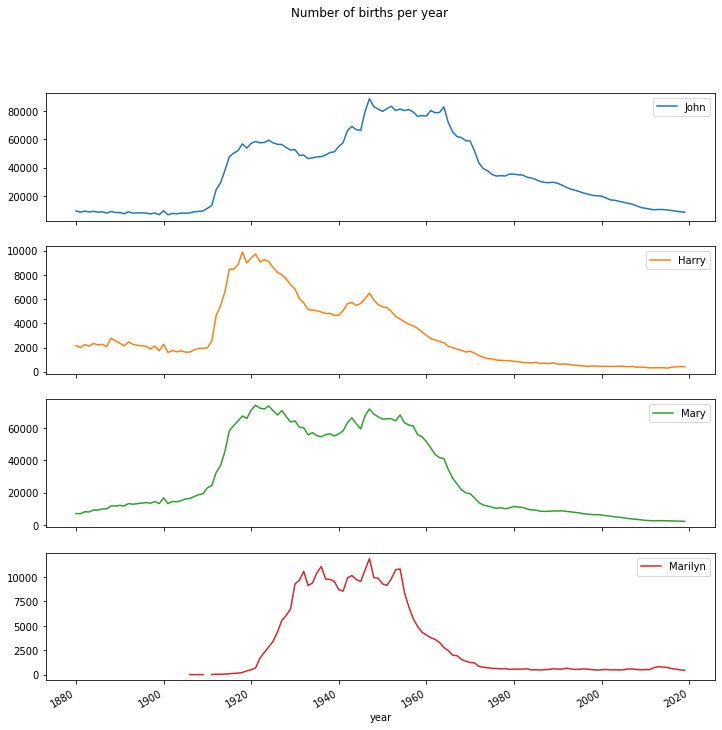

In [27]:
subset = total_births_top1000[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 12), grid=False,
title="Number of births per year")

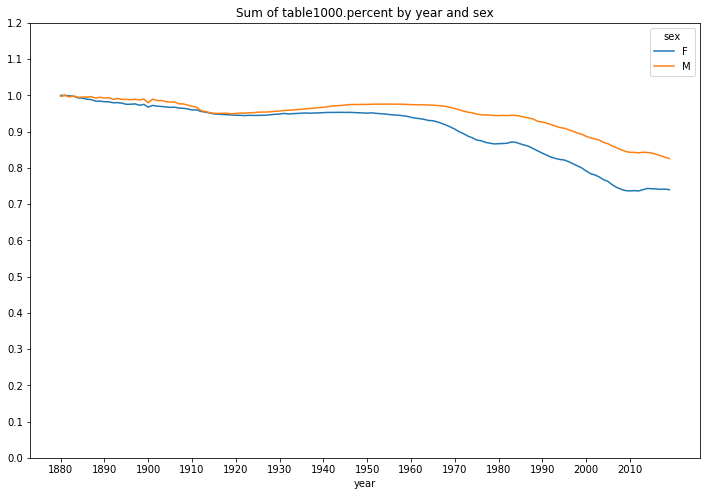

In [28]:
table = top1000.pivot_table('percent', index='year', columns='sex', aggfunc=sum)
table.plot(title='Sum of table1000.percent by year and sex', 
           yticks=np.linspace(0, 1.2, 13), 
           xticks=range(1880, 2020, 10), 
           figsize=(12,8))

In [29]:
df = boys[boys.year == 2010]
prop_cumsum = df.sort_values(by='percent', ascending=False).percent.cumsum()

In [30]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='percent', ascending=False)
    return group.percent.cumsum().values.searchsorted(q) + 1

#prop_cumsum.values.searchsorted(0.5)

In [31]:
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


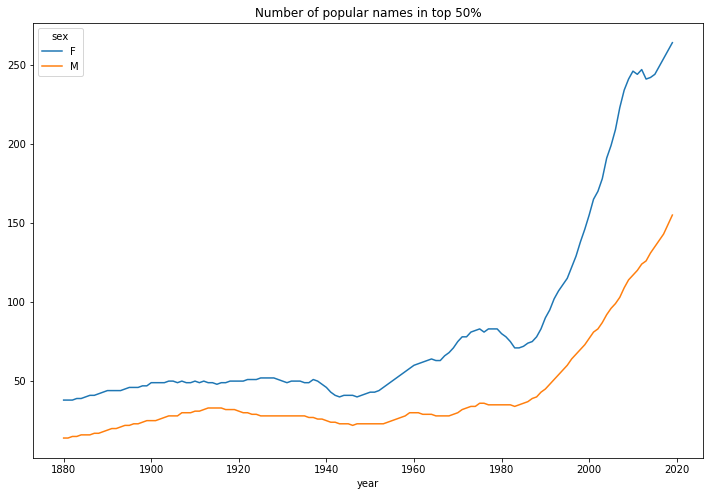

In [32]:
diversity.plot(title="Number of popular names in top 50%", figsize=(12,8))

In [33]:
# extract last letter from name column
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'
table = names.pivot_table('births', index=last_letters, columns=['sex', 'year'], aggfunc=sum)
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()

sex                   F                                  M              \
year               1910        1960        2010       1910        1960   
last_letter                                                              
a           108,395.000 691,251.000 675,059.000    977.000   5,207.000   
b                   nan     694.000     454.000    411.000   3,914.000   
c                 5.000      49.000     953.000    482.000  15,472.000   
d             6,751.000   3,732.000   2,633.000 22,114.000 262,140.000   
e           133,592.000 435,050.000 315,891.000 28,662.000 178,814.000   

sex                      
year               2010  
last_letter              
a            28,772.000  
b            39,149.000  
c            23,279.000  
d            44,690.000  
e           129,916.000

In [34]:
subtable.sum()

sex  year
F    1910     396,482.000
     1960   2,022,126.000
     2010   1,770,632.000
M    1910     194,214.000
     1960   2,132,733.000
     2010   1,911,572.000
dtype: float64

In [35]:
letter_prop = subtable / subtable.sum().astype(float)

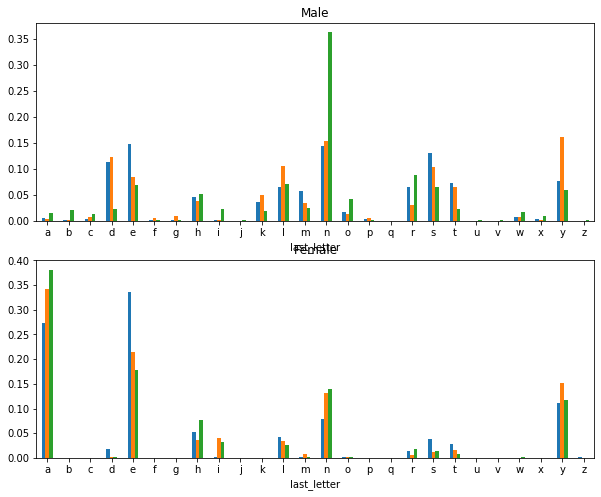

In [36]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male',legend=False)
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',legend=False)

In [37]:
letter_prop = table / table.sum().astype(float)
dny_ts = letter_prop.loc[['d', 'n', 'y'], 'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083,0.153,0.076
1881,0.083,0.153,0.077
1882,0.085,0.150,0.078
1883,0.084,0.152,0.079
1884,0.086,0.150,0.080


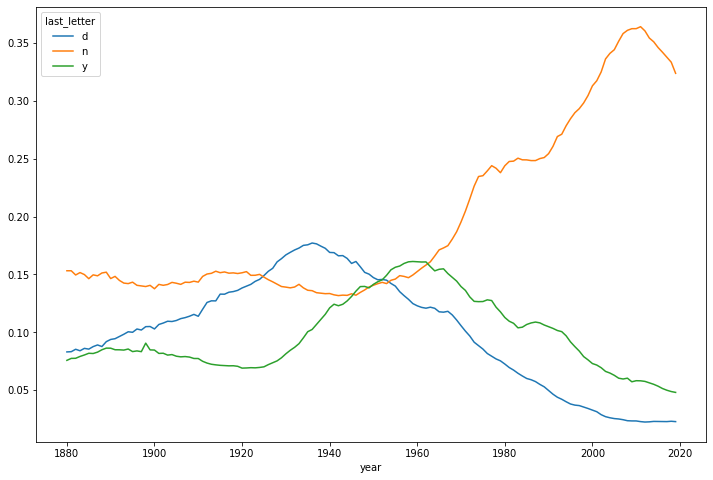

In [38]:
dny_ts.plot(figsize=(12,8))

In [39]:
all_names = top1000.name.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [40]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35028
Lesli        929
Leslie    378647
Lesly      11429
Name: births, dtype: int64

In [41]:
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)

In [42]:
table.head()

sex,F,M
year,,
1880,0.092,0.908
1881,0.107,0.893
1882,0.066,0.934
1883,0.053,0.947
1884,0.107,0.893


In [43]:
table.tail()

sex,F,M
year,,
2015,1.000,nan
2016,1.000,nan
2017,1.000,nan
2018,1.000,nan
2019,1.000,nan


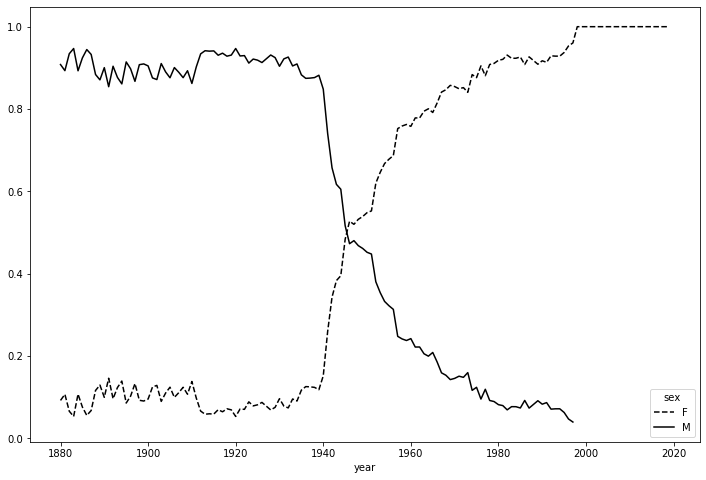

In [44]:
table.plot(style={'M': 'k-', 'F': 'k--'}, figsize=(12,8))

## 3rd example: Data Science Workflow

There is no template for solving a data science problem. The roadmap changes with every new dataset and new problem. But we do see similar steps in many different projects. I wanted to make a clean workflow to serve as an example to aspiring data scientists. I also wanted to give people working with data scientists an easy to understand guide to data science.  

This is a high-level overview and every step (and almost every sentence) in this overview can be addressed on its own. Many books like Introduction to Statistical Learning by Hastie and Tibshirani and many courses like Andrew Ng’s Machine Learning course at Stanford, go into these topics in more detail. The data science community is full of great literature and great resources. Be sure to dive deeper into any topic you find interesting.  

Overview  
    + Objective
    + Importing Data
    + Data Exploration and Data Cleaning
    + Baseline Modeling
    + Secondary Modeling
    + Communicating Results
    + Conclusion
    + Resources

Lastly, I want to say that this process isn’t completely linear. You will jump around as you learn more about the data and find new problems to solve along the way.

Let’s get started!  

### 1) Objective  

What is the problem you are trying to solve? Remove modeling, evaluation metrics, and data science from the equation. What is the problem your company faces? What do you want to learn more about? Clearly stating your problem is the first step to solving it and without a clear problem, you could find yourself down a data-science rabbit-hole.

For this workflow, we are going to analyze the highest ranked movies on IMDB.com. I want to build a model to predict IMDB movie rating based on features like budget, runtime, and votes on the website.  

### 2) Importing Data  

Data can come from a variety of sources. You can import CSV files from your local machine, query SQL servers, or use a web scraper to strip data from the Internet. I like to use the Python library, Pandas, to import data. Pandas is a great open-source data analysis library. We will also be using Pandas in the data cleaning step of this workflow.

For this example, we are going to import data from our local machine. I will be using a dataset from Kaggle.com’s user Sai Pranav. The dataset is titled “Top Ranked English Movies of this Decade” and it was in a CSV file.

https://www.kaggle.com/saipranava/top-ranked-enlglish-movies-of-this-decade/data  

In [45]:
df = pd.read_csv(datapath / 'CSVs' / 'IMDB.csv', index_col=0, encoding='latin-1')

### 3) Data Exploration and Data Cleaning

Now that we have our data imported into Pandas, we can check out the first few rows of our dataframe.

In [46]:
df.head()

,Title,Rating,TotalVotes,Genre1,Genre2,Genre3,MetaCritic,Budget,Runtime,ï..CVotes10,...,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS
1,12 Years a Slave (2013),8.100,"496,092",Biography,Drama,History,96.000,"$20,000,000",134 min,75556,...,8.0,7.9,8.0,7.8,7.8,8.1,8.0,7.7,8.3,8.0
2,127 Hours (2010),7.600,"297,075",Adventure,Biography,Drama,82.000,"$18,000,000",94 min,28939,...,7.5,7.5,7.5,7.3,7.3,7.5,7.6,7.0,7.7,7.6
3,50/50 (2011),7.700,"283,935",Comedy,Drama,Romance,72.000,"$8,000,000",100 min,28304,...,7.6,7.6,7.6,7.4,7.4,7.5,7.4,7.0,7.9,7.6
4,About Time (2013),7.800,"225,412",Comedy,Drama,Fantasy,nan,"$12,000,000",123 min,38556,...,7.6,7.6,7.7,7.6,7.5,7.8,7.7,6.9,7.8,7.7
5,Amour (2012),7.900,"76,121",Drama,Romance,NaN,94.000,"$8,900,000",127 min,11093,...,7.7,7.7,7.9,7.9,7.8,8.1,6.6,7.2,7.9,7.8



There are three distinctions I like to make from the get-go. Is this supervised learning or unsupervised learning? Is this a classification problem or is it a regression problem? Is this a prediction problem or an inference problem?

Supervised or Unsupervised Learning: With Supervised learning, we have clearly labeled dependent and independent variables. The dependent variable (our target) is known. If we are looking at a linear regression, our y variable is obvious. If we do have a clearly labeled y variable, we are performing supervised learning because the computer is learning from our clearly labeled dataset. It is learning the relationship between our x variables and our y variables. Supervised learning can be broken down into regression and classification problems. With unsupervised learning, we do not have a clear dependent variable. We have a feature matrix of x variables and no y variable. Unsupervised learning problems can involve clustering and creating associations. I won’t get into clustering in this overview, but it’s a great skillset to learn. Additionally, unsupervised learning can be beneficial from a data exploration perspective.

Classification or Regression: Now that we know we have a supervised learning problem, we can decide whether it is a classification or regression problem. I look at the y variable and determine if that variable is a continuous or discrete variable. Categorical y variables fall into the classification setting whereas continuous quantitative variables fall into the regression setting. An example of a classification problem would be determining where or not a credit card transaction is fraudulent. This is a binary classification problem because each transaction is either fraudulent or not fraudulent. The classic example of a regression problem is determining the price of a house based on features like square footage, number of bedrooms, and lot size.

Prediction or Inference: In a prediction setting, we want our model to estimate a y value, given a variety of features. From our regression example above, we would want to feed our model a house that has 1,500 square feet, 2 bedrooms, and a 0.50 acre lot. Our model would then predict that the house was worth $200,000. In an inference setting, we want to know how a feature (x variable) affects the output (y variable). We could see how the price of a house increases when you add an additional bedroom to the house.

These three sets of questions can offer a lot of guidance when solving your data science problem.

In our example, we are going to be using regression (supervised learning) to predict IMDB rating from Metacritic Ratings, Budgets, Runtime, and Votes.

Back to the coding part! Let’s determine which variable is our target and which features we think are important.

In [47]:
df.columns

Index(['Title', 'Rating', 'TotalVotes', 'Genre1', 'Genre2', 'Genre3',
       'MetaCritic', 'Budget', 'Runtime', 'ï..CVotes10', 'CVotes09',
       'CVotes08', 'CVotes07', 'CVotes06', 'CVotes05', 'CVotes04', 'CVotes03',
       'CVotes02', 'CVotes01', 'CVotesMale', 'CVotesFemale', 'CVotesU18',
       'CVotesU18M', 'CVotesU18F', 'CVotes1829', 'CVotes1829M', 'CVotes1829F',
       'CVotes3044', 'CVotes3044M', 'CVotes3044F', 'CVotes45A', 'CVotes45AM',
       'CVotes45AF', 'CVotes1000', 'CVotesUS', 'CVotesnUS', 'VotesM', 'VotesF',
       'VotesU18', 'VotesU18M', 'VotesU18F', 'Votes1829', 'Votes1829M',
       'Votes1829F', 'Votes3044', 'Votes3044M', 'Votes3044F', 'Votes45A',
       'Votes45AM', 'Votes45AF', 'VotesIMDB', 'Votes1000', 'VotesUS',
       'VotesnUS'],
      dtype='object')

Our target is going to be the column titled Rating and our features are going to be the columns titled the following: MetaCritic, Budget, Runtime, VotesUS, VotesnUS, and TotalVotes. I will remove all of the columns we don’t need for this analysis.

In [48]:
df = df[['Title', 'Rating', 'TotalVotes', 'MetaCritic', 'Budget', 'Runtime', 'VotesUS', 'VotesnUS']]
df.head(10)

,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,VotesUS,VotesnUS
1,12 Years a Slave (2013),8.100,"496,092",96.000,"$20,000,000",134 min,8.3,8.0
2,127 Hours (2010),7.600,"297,075",82.000,"$18,000,000",94 min,7.7,7.6
3,50/50 (2011),7.700,"283,935",72.000,"$8,000,000",100 min,7.9,7.6
4,About Time (2013),7.800,"225,412",nan,"$12,000,000",123 min,7.8,7.7
5,Amour (2012),7.900,"76,121",94.000,"$8,900,000",127 min,7.9,7.8
6,Argo (2012),7.700,"486,840",86.000,"$44,500,000",120 min,8.0,7.6
7,Arrival (2016),8.000,"370,842",81.000,"$47,000,000",116 min,8.0,7.9
8,Beasts of No Nation (2015),7.800,"51,781",79.000,"$6,000,000",137 min,7.9,7.7
9,Before Midnight (2013),7.900,"106,553",94.000,"$3,000,000",109 min,8.0,7.9
10,Big Hero 6 (2014),7.800,"315,485",74.000,"Opening Weekend: 56,215,889 ...",NaN,7.9,7.7


Pandas and Matplotlib (a popular Python plotting library) are going to assist in the majority of our exploration. Exploratory data analysis (EDA) gives the data scientist an opportunity to really learn about the data he or she is working with. Many data scientists find themselves coming back to EDA and the findings he or she found in EDA later on in the process.

Throughout the EDA process, I clean the data. Data from the real world is very messy. But as I work through the EDA process and learn about the data, I take notes on things I need to fix in order to conduct my analysis. Data cleaning and EDA go hand in hand for me. I work between the two for a sizeable amount of time and I often find myself coming back to these stages.

The first thing I check is data types. Getting all of the values in the correct format is important. This can involve stripping characters from strings, converting integers to floats, or many other things.

In [49]:
df.dtypes

Title          object
Rating        float64
TotalVotes     object
MetaCritic    float64
Budget         object
Runtime        object
VotesUS        object
VotesnUS       object
dtype: object

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 1 to 118
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       118 non-null    object 
 1   Rating      118 non-null    float64
 2   TotalVotes  118 non-null    object 
 3   MetaCritic  111 non-null    float64
 4   Budget      118 non-null    object 
 5   Runtime     97 non-null     object 
 6   VotesUS     118 non-null    object 
 7   VotesnUS    117 non-null    object 
dtypes: float64(2), object(6)
memory usage: 8.3+ KB


In [51]:
df.TotalVotes = df.TotalVotes.str.replace(',', '')
df.TotalVotes = df.TotalVotes.astype(int)
# Total Votes column is ready.

In [52]:
df.Budget.unique()

array(['$20,000,000 ', '$18,000,000 ', '$8,000,000 ', '$12,000,000 ',
       '$8,900,000 ', '$44,500,000 ', '$47,000,000 ', '$6,000,000 ',
       '$3,000,000 ',
       'Opening Weekend:         56,215,889              (USA)      (7 November 2014)',
       '$13,000,000 ', '$4,000,000 ', '$40,000,000 ', '$250,000,000 ',
       '$170,000,000 ',
       'Opening Weekend:         93,824              (USA)      (8 July 2016)',
       '$55,000,000 ', '$35,000,000 ', '$5,000,000 ', '$58,000,000 ',
       'Opening Weekend:         56,397,125              (USA)      (9 July 2010)',
       'Opening Weekend:         10,739              (USA)      (16 March 2012)',
       '$10,000,000 ', '$100,000,000 ', '$165,000,000 ', '$15,000,000 ',
       '$178,000,000 ', '$7,000,000 ', '$14,000,000 ', '$68,000,000 ',
       '$61,000,000 ', ' £150,000,000', '$23,000,000 ', '$25,000,000 ',
       'Opening Weekend:         49,451,322              (USA)      (13 June 2014)',
       'Opening Weekend:         43,732

In [53]:
df.Budget.value_counts()

$12,000,000                                                                   6
$15,000,000                                                                   5
$25,000,000                                                                   5
$200,000,000                                                                  4
$40,000,000                                                                   4
                                                                             ..
$190,000,000                                                                  1
$58,000,000                                                                   1
$135,000,000                                                                  1
$50,000,000                                                                   1
Opening Weekend:         49,451,322              (USA)      (13 June 2014)    1
Name: Budget, Length: 78, dtype: int64

In [54]:
df = df[(df.Budget.str.contains("Opening") == False) & (df.Budget.str.contains("Production") == False)]
df.Budget = df.Budget.str.replace('[^\x00-\x7F]','')
df.Budget = df.Budget.str.replace(',', '')
df.Budget = df.Budget.str.replace('$', '')
df.Budget = df.Budget.astype(int)
# Budget column is ready.

In [55]:
df.Runtime = df.Runtime.str.extract('(\d+)', expand=False)
# Runtime column is now ready.

Missing values and null values are common. Sometimes you have very large matrices with little information in them. These are known as sparse matrices. Handling missing and null values is a whole topic in itself. This topic is known as missing data imputation and I can’t get into it here. Be sure to look up more information on this topic, especially if you run into sparse matrices. For our purposes, I am going to simply drop the movies with null values. This isn’t always the best idea, but I have elected to do so in this analysis.

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 1 to 118
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       99 non-null     object 
 1   Rating      99 non-null     float64
 2   TotalVotes  99 non-null     int32  
 3   MetaCritic  93 non-null     float64
 4   Budget      99 non-null     int32  
 5   Runtime     97 non-null     object 
 6   VotesUS     99 non-null     object 
 7   VotesnUS    99 non-null     object 
dtypes: float64(2), int32(2), object(4)
memory usage: 6.2+ KB


In [57]:
df = df.dropna()

In [58]:
df.Runtime = df.Runtime.astype(int)
df.VotesnUS = df.VotesnUS.astype(float)
df.VotesUS = df.VotesUS.astype(float)

In [59]:
df.head()

,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,VotesUS,VotesnUS
1,12 Years a Slave (2013),8.100,496092,96.000,20000000,134,8.300,8.000
2,127 Hours (2010),7.600,297075,82.000,18000000,94,7.700,7.600
3,50/50 (2011),7.700,283935,72.000,8000000,100,7.900,7.600
5,Amour (2012),7.900,76121,94.000,8900000,127,7.900,7.800
6,Argo (2012),7.700,486840,86.000,44500000,120,8.000,7.600


In [60]:
df.dtypes

Title          object
Rating        float64
TotalVotes      int32
MetaCritic    float64
Budget          int32
Runtime         int32
VotesUS       float64
VotesnUS      float64
dtype: object

There are many different ways you can conduct EDA with Pandas on your data. Checking missing values, checking data types, and formatting the data are only the tip of the iceberg. Look for the number of unique values. Use the Pandas describe method to get summary statistics on your columns. Pandas is a very useful tool at this stage of the data analysis process and becoming familiar with data cleaning with Pandas is an essential tool for any data scientist.

The last part of EDA is plotting. Plotting is very important because it allows you to visually inspect your data. Histograms, scatter matrices, and box plots can all be used to offer another layer of insight into your data problem. For this example, we will use Pandas to create a scatter matrix.

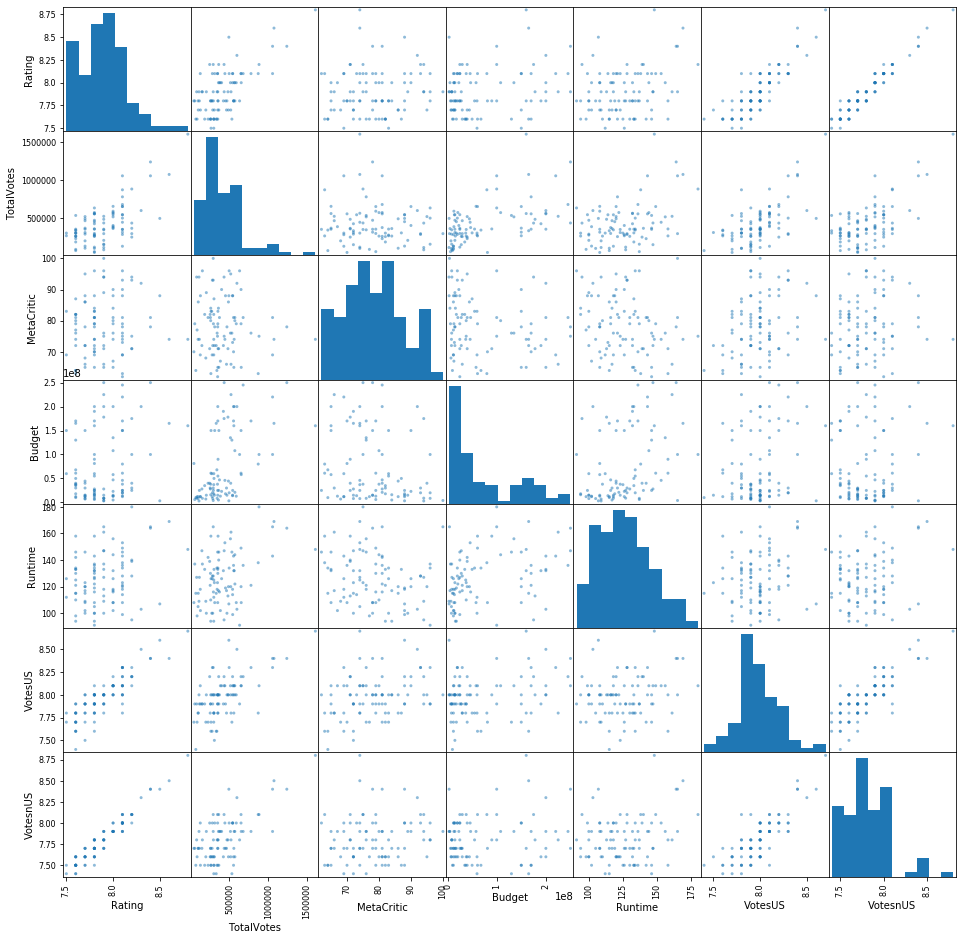

In [61]:
pd.plotting.scatter_matrix(df, figsize=(16,16))
plt.show()

In the data exploration and cleaning phase, I also perform feature engineering. Feature engineering is the construction of new features from old features. Some basic types of feature engineering would be to create interaction variables from two features or to create lagged variables for time series analysis. Feature engineering is another topic I am going to brush over in this workflow but it shouldn’t be forgotten.  

### 4) Baseline Modeling

As a data scientist, you will build a lot of models. You will use a variety of algorithms to perform a wide variety of tasks. You will need to use intuition and experience to decide when certain models are appropriate. As an economist by trade, I prefer to begin with linear regression for my regression problems and logistic regression for my classification problems. (I also tend to use kNN for baseline classification models and K-Means as my first clustering algorithm in unsupervised learning.) These models will give you a baseline upon which you can improve.

In Kaggle competitions, many of the winners use advanced neural networks, XGBoost, or Random Forests to solve data science problems. All of these will come later and should get us more accurate predictions than linear and logistic regressions.

Scikit-Learn is a machine learning package for Python that can be used for a variety of tasks. We can use Scikit-Learn for modeling (classification, regression, and clustering). It can also be used for dimensionality reduction (Principal Component Analysis), model selection (grid search, evaluation metrics), and preprocessing data. The basics of modeling are similar across different algorithms when you are working within Scikit-Learn.

During model preprocessing we are going to separate out our features from our dependent variables, scale the data across the board, and use a train-test-split to prevent overfitting of our model. Overfitting is when our model too closely tracks our training data and when it is fed new data, it doesn’t perform well. This means the model won't generalize well to new problems. The model is picking up all of the noise in the training data and memorizing it. Creating a training-test-split helps to combat overfitting. Additionally, we could use Cross Validation to prevent overfitting. Be sure to look up more about cross validation on your own.


In [62]:
y = df.Rating
X = df[['TotalVotes', 'MetaCritic', 'Budget', 'Runtime', 'VotesUS', 'VotesnUS']]
# We need to separate our feature matrix from our y variable for Sklearn.

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [64]:
cor_X = MinMaxScaler().fit_transform(X)

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(cor_X, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(73, 6) (73,)
(19, 6) (19,)


In [67]:
from sklearn import linear_model

In [68]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

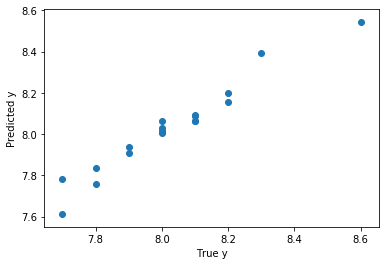

In [69]:
plt.scatter(y_test, predictions)
plt.xlabel('True y')
plt.ylabel('Predicted y')
plt.show()

In [70]:
print ('Score:', model.score(X_test, y_test))  # R-squared is the default metric used by Sklearn.

Score: 0.9504452850245046


Our model performed pretty well. It was able to reach an R-squared of 0.96. This evaluation metric, R-squared, is a goodness-of-fit metric. It is the percentage of variation in our y variable explained by our model. For this regression problem, we could also have evaluated our model with Root Mean Squared Error and Adjusted R-squared.

Model evaluation metrics are numerous. For classification problems, common evaluation metrics are accuracy and ROC-AUC scores. Evaluating your model is very important and learning more about the evaluation metrics is wise.

Overall, I would use caution with these results. The features we have selected are likely collinear. Basically, collinearity is when you have features that are very similar or are giving us the same information about the dependent variable. The classic example of collinearity (perfect collinearity) is a feature that gives us a temperature in Celsius and another that reports Fahrenheit. One of these variables would be redundant. The features VotesUS and VotesnUS (votes non-US) could be very related. This could be a reason why we have such a high R-squared value. Luckily, we will use a non-parametric algorithm in Part 5.

There are a few ways we could combat collinearity and the most basic of them would be to drop one of the Votes variables. There are other methods, like proxy variables, we could use to solve this collinearity problem. But we won’t get into those here (I seem to say that often).

In [71]:
lm.coef_

array([-0.10316714, -0.08410107,  0.04867108,  0.03910411,  0.38289893,
        1.04420198])

Before moving on to other models, I want to bring up the beta coefficients from our linear model. We see that the Votes outside the US had the largest positive impact on the IMDB rating. This form of inference is probably not a great idea because we don’t know if these coefficients are statistically significant or not. If you were trying to solve a regression inference problem, I would recommend using the Python library Statsmodels. The output from Statsmodels is an ANOVA table plus the coefficients and their associated p-values.

### 5) Secondary Modeling

You can build hundreds of models and sometimes we spend exorbitant amounts of time for model build and model tune. Instead of going into every single regression model you could use in this scenario, I am going to use a Kaggle favorite, Random Forests. The Random Forests model is an ensemble model that uses many decision trees to classify or regress. The training algorithm uses bagging, which is a combination of bootstrap and aggregating. The Random Forest algorithm also has the benefit of being non-parametric. Since this isn’t a model tutorial (which may be fun to make), I am not going to get into specifics of this algorithm. Let’s just see how to use it in Scikit-Learn.

In [72]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
rf = RandomForestRegressor(n_jobs=-1)
model = rf.fit(X_train, y_train)
predictions = rf.predict(X_test)

In [74]:
print ('Score:', model.score(X_test, y_test))  # R-square is still the default for Sklearn.

Score: 0.8736954088050286


In [75]:
model.feature_importances_

array([0.02190627, 0.0126194 , 0.01527865, 0.0144709 , 0.10057314,
       0.83515164])

Whoa! Our Random Forest model did worse than our linear regression model. That’s a surprising result. That shows us the power of simple, easy-to-understand models like linear regression. If we look at the feature importance, we can see this Random Forest model agrees with our linear regression model that Votes outside the US matter a lot in predicting IMDB ratings. Our dataset is pretty small so this odd result could be a product of the small dataset.

Alternatively, we have mentioned that our linear regression may suffer from high collinearity. In this scenario, I would trust the results of the random forest model over that of the linear regression because of this collinearity problem.

Now there is a whole rabbit-hole of parameter tuning we could go down. Each algorithm is going to have a set of parameters you can optimize. With our Random Forest Model, I often experiment with the max depth and the learning rate. But as you can tell, these parameters are specific to your modeling algorithm so I won’t get into it here. I will mention Grid Search. Grid search allows you to vary the parameters in your model (thus creating multiple models), train those models, and evaluate each model using cross validation. Scikit-Learn has a GridSearchCV for this. When you decide to tune multiple parameters at one time, it may be beneficial to use grid search.

What now?

6) Communicating Results

In my mind there are two directions your data science project can go: the data science product and the data science report.

First, you can create a data science product. Getting your model into production is, once again, a topic in itself. To begin with, you will need to move code from your Jupyter Notebook to scripts. In most firms, the data scientist will be working along side the software engineering team to write this code. The model will first need to be pickled and this can be accomplished with Scikit-Learn’s Joblib. Then we can use Flask and Heroku to create an application for your model. In this tutorial, I have elected to forgo this method. Developing data science products is a very useful skill and I myself am diving deeper into these processes. I encourage you to do the same!

Alternatively to the data product, you can create a data science report. You can showcase your results to the firm with a presentation and offer a technical overview on the process. Remember to keep your audience in mind. If you are presenting results to a room full of data scientists, go into detail. If you are advising the sales team, don’t talk about the universal approximation theorem for 45 minutes before explaining your results. To me, a data science report is a bit like a mini thesis. You are presenting a paper, which your peers (and bosses) will scrutinize and which you need to defend.

If your company allows you to publish the results, I would recommend bringing your presentation to a data science meetup. Feedback on your project for the data science community at large is always a great learning experience. Check out PyData videos on YouTube if you want to see some excellent presentations. Additionally, write a blog post and push your code to GitHub so the data science community can learn from your success. Communicating your results is a part of the scientific process so don’t keep your findings hidden away!

### 7) Conclusion

I hope this workflow and mini-project was helpful for aspiring data scientists and people who work with data scientists. Like I mentioned a million times, there is a lot of detail that I glossed over here. Let me know if you have any questions or comments!

### 8) Resources

Idea for the workflow came from William Wolf (Platzi.com) and Doing Data Science by Cathy O’Neil and Rachel Schutt.

Elements of Statistical Learning and Introduction to Statistical Learning are great texts that can offer more details about many of the topics I glossed over.

h/t to Brice Wolfgang for editing.

## 4th example: Houses Dataset

In [76]:
df_houses = pd.read_csv(datapath / 'CSVs' / 'train_houses.csv', )
df_houses.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.000,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.000,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,nan,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.000,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.000,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [77]:
df_houses.columns = [i.replace(' ', '_').lower() for i in df_houses.columns]
df_houses.columns

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd',
       'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype',
       'masvnrarea', 'exterqual', 'extercond', 'foundation', 'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'paveddrive

In [78]:
def ames_eda(df): 
    eda_df = {}
    eda_df['null_sum'] = df.isnull().sum()
    eda_df['null_pct'] = df.isnull().mean()
    eda_df['dtypes'] = df.dtypes
    eda_df['count'] = df.count()
    eda_df['mean'] = df.mean()
    eda_df['median'] = df.median()
    eda_df['min'] = df.min()
    eda_df['max'] = df.max()
    
    return pd.DataFrame(eda_df)

In [79]:
ames_eda(df_houses)

,null_sum,null_pct,dtypes,count,mean,median,min,max
1stflrsf,0,0.000,int64,1460,"1,162.627","1,087.000",334,4692
2ndflrsf,0,0.000,int64,1460,346.992,0.000,0,2065
3ssnporch,0,0.000,int64,1460,3.410,0.000,0,508
alley,1369,0.938,object,91,nan,nan,NaN,NaN
bedroomabvgr,0,0.000,int64,1460,2.866,3.000,0,8
...,...,...,...,...,...,...,...,...
utilities,0,0.000,object,1460,nan,nan,AllPub,NoSeWa
wooddecksf,0,0.000,int64,1460,94.245,0.000,0,857
yearbuilt,0,0.000,int64,1460,"1,971.268","1,973.000",1872,2010
yearremodadd,0,0.000,int64,1460,"1,984.866","1,994.000",1950,2010


In [80]:
df_houses.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [81]:
df_houses.select_dtypes(include=['object']).columns

Index(['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual',
       'functional', 'fireplacequ', 'garagetype', 'garagefinish', 'garagequal',
       'garagecond', 'paveddrive', 'poolqc', 'fence', 'miscfeature',
       'saletype', 'salecondition'],
      dtype='object')

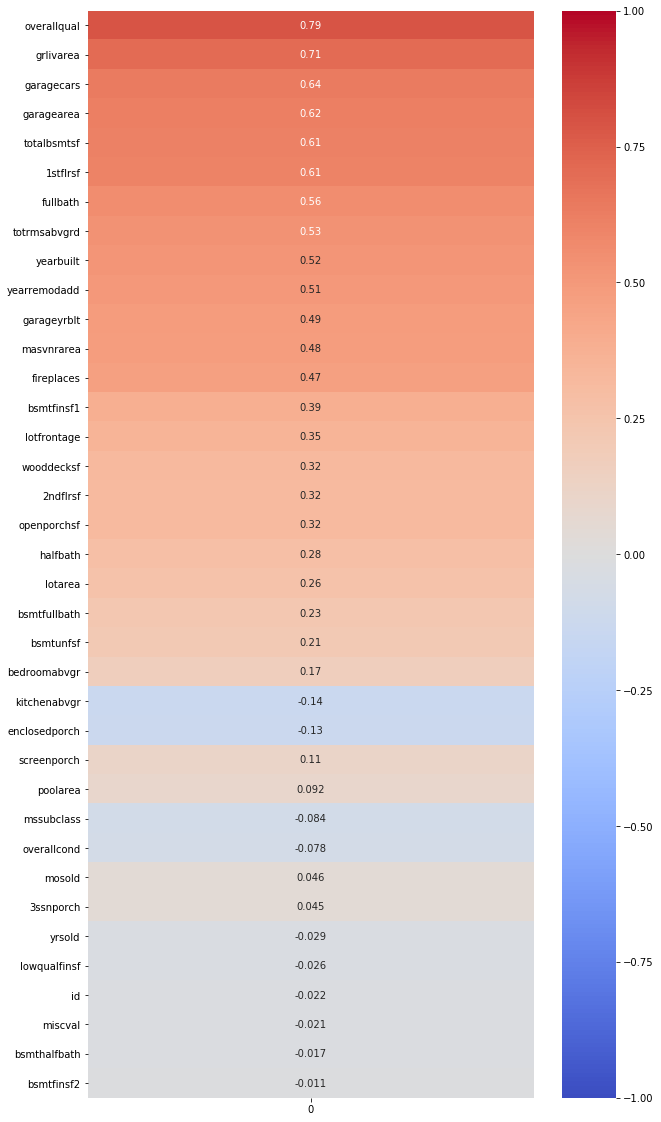

In [82]:
correlations = df_houses.corrwith(df_houses['saleprice']).iloc[:-1].to_frame()
correlations['abs'] = correlations[0].abs()
sorted_correlations = correlations.sort_values('abs', ascending=False)[0]
fig, ax = plt.subplots(figsize=(10,20))
sns.heatmap(sorted_correlations.to_frame(), cmap='coolwarm', annot=True, vmin=-1, vmax=1, ax=ax);

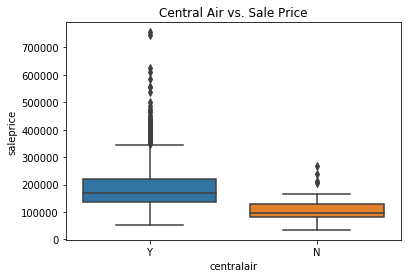

In [83]:
sns.boxplot(df_houses['centralair'], df_houses['saleprice']).set_title('Central Air vs. Sale Price');

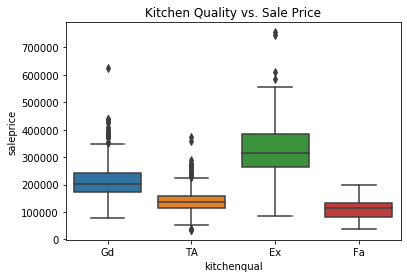

In [84]:
sns.boxplot(df_houses['kitchenqual'], df_houses['saleprice']).set_title('Kitchen Quality vs. Sale Price');

In [85]:
df_houses['kitchenqual'].value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: kitchenqual, dtype: int64

In [86]:
df_houses['kitchenqual'] = df_houses['kitchenqual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
df_houses['kitchenqual'].value_counts()

3    735
4    586
5    100
2     39
Name: kitchenqual, dtype: int64

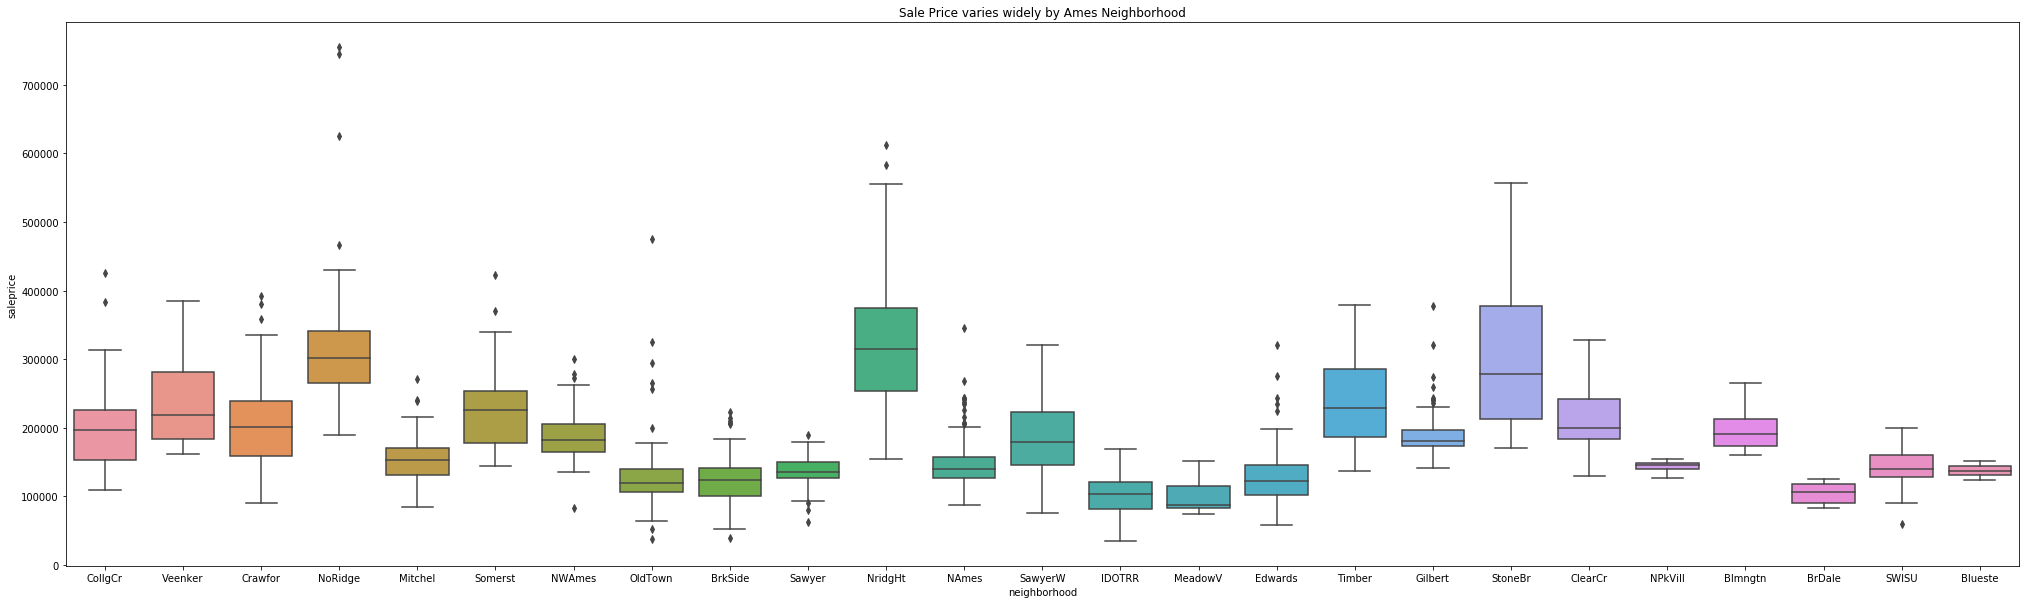

In [87]:
plt.figure(figsize=(35,10)) # adjust the fig size to see everything
sns.boxplot(df_houses['neighborhood'], df_houses['saleprice']).set_title('Sale Price varies widely by Ames Neighborhood');

In [88]:
pd.get_dummies(df_houses, columns=["neighborhood"], drop_first=True)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker
0,1,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
1,2,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,1
2,3,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
3,4,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
4,5,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.000,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
1456,1457,20,RL,85.000,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
1457,1458,70,RL,66.000,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0
1458,1459,20,RL,68.000,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,0,0,0,0,0,0


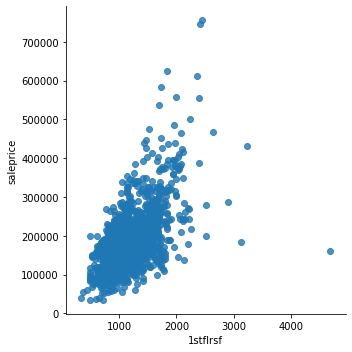

In [89]:
sns.lmplot(x="1stflrsf", y="saleprice", data=df_houses, fit_reg=False)

## 5th example: Vehicles Dataset

In [90]:
transform = 'sales_transactions.xlsx'
zipname = 'vehicles'

In [91]:
df_tf = pd.read_excel(datapath / 'Miscellaneous' / transform)
df_tf.head(20)

,account,name,order,sku,quantity,unit price,ext price
0,383080,Will LLC,10001,B1-20000,7,33.690,235.830
1,383080,Will LLC,10001,S1-27722,11,21.120,232.320
2,383080,Will LLC,10001,B1-86481,3,35.990,107.970
3,412290,Jerde-Hilpert,10005,S1-06532,48,55.820,"2,679.360"
4,412290,Jerde-Hilpert,10005,S1-82801,21,13.620,286.020
5,412290,Jerde-Hilpert,10005,S1-06532,9,92.550,832.950
6,412290,Jerde-Hilpert,10005,S1-47412,44,78.910,"3,472.040"
7,412290,Jerde-Hilpert,10005,S1-27722,36,25.420,915.120
8,218895,Kulas Inc,10006,S1-27722,32,95.660,"3,061.120"
9,218895,Kulas Inc,10006,B1-33087,23,22.550,518.650


In [92]:
grouped = df_tf.groupby('order')

In [93]:
new_gb = pd.concat([grouped.get_group(group) for i,group in enumerate(grouped.groups)])
new_gb

,account,name,order,sku,quantity,unit price,ext price
0,383080,Will LLC,10001,B1-20000,7,33.690,235.830
1,383080,Will LLC,10001,S1-27722,11,21.120,232.320
2,383080,Will LLC,10001,B1-86481,3,35.990,107.970
3,412290,Jerde-Hilpert,10005,S1-06532,48,55.820,"2,679.360"
4,412290,Jerde-Hilpert,10005,S1-82801,21,13.620,286.020
5,412290,Jerde-Hilpert,10005,S1-06532,9,92.550,832.950
6,412290,Jerde-Hilpert,10005,S1-47412,44,78.910,"3,472.040"
7,412290,Jerde-Hilpert,10005,S1-27722,36,25.420,915.120
8,218895,Kulas Inc,10006,S1-27722,32,95.660,"3,061.120"
9,218895,Kulas Inc,10006,B1-33087,23,22.550,518.650


In [94]:
grouped["ext price"].sum()

order
10001     576.120
10005   8,185.490
10006   3,724.490
Name: ext price, dtype: float64

In [95]:
grouped["ext price"].max()

order
10001     235.830
10005   3,472.040
10006   3,061.120
Name: ext price, dtype: float64

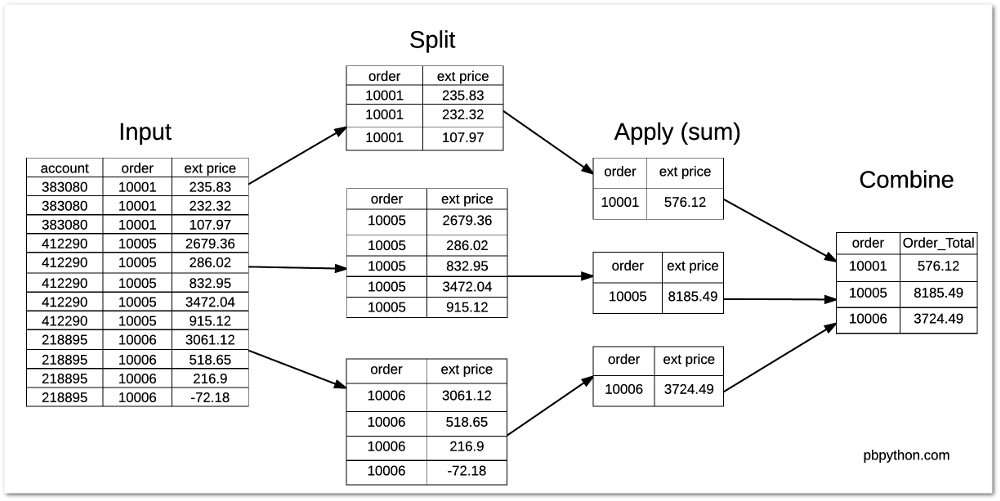

In [96]:
display(Image(os.path.join('../datasets/','Figs', 'groupby-example.png'), width=700))

In [97]:
order_total = df_tf.groupby('order')["ext price"].sum().rename("Order_Total").reset_index()
df_tf1 = df_tf.merge(order_total)

df_tf1["Percent_of_Order"] = df_tf1["ext price"] / df_tf1["Order_Total"]
df_tf1

,account,name,order,sku,quantity,unit price,ext price,Order_Total,Percent_of_Order
0,383080,Will LLC,10001,B1-20000,7,33.690,235.830,576.120,0.409
1,383080,Will LLC,10001,S1-27722,11,21.120,232.320,576.120,0.403
2,383080,Will LLC,10001,B1-86481,3,35.990,107.970,576.120,0.187
3,412290,Jerde-Hilpert,10005,S1-06532,48,55.820,"2,679.360","8,185.490",0.327
4,412290,Jerde-Hilpert,10005,S1-82801,21,13.620,286.020,"8,185.490",0.035
5,412290,Jerde-Hilpert,10005,S1-06532,9,92.550,832.950,"8,185.490",0.102
6,412290,Jerde-Hilpert,10005,S1-47412,44,78.910,"3,472.040","8,185.490",0.424
7,412290,Jerde-Hilpert,10005,S1-27722,36,25.420,915.120,"8,185.490",0.112
8,218895,Kulas Inc,10006,S1-27722,32,95.660,"3,061.120","3,724.490",0.822
9,218895,Kulas Inc,10006,B1-33087,23,22.550,518.650,"3,724.490",0.139


In [98]:
df_tf.groupby('order')["ext price"].transform('sum')

0      576.120
1      576.120
2      576.120
3    8,185.490
4    8,185.490
5    8,185.490
6    8,185.490
7    8,185.490
8    3,724.490
9    3,724.490
10   3,724.490
11   3,724.490
Name: ext price, dtype: float64

In [99]:
df_tf["Order_Total"] = df_tf.groupby('order')["ext price"].transform('sum')
df_tf["Percent_of_Order"] = df_tf["ext price"] / df_tf["Order_Total"]
df_tf

,account,name,order,sku,quantity,unit price,ext price,Order_Total,Percent_of_Order
0,383080,Will LLC,10001,B1-20000,7,33.690,235.830,576.120,0.409
1,383080,Will LLC,10001,S1-27722,11,21.120,232.320,576.120,0.403
2,383080,Will LLC,10001,B1-86481,3,35.990,107.970,576.120,0.187
3,412290,Jerde-Hilpert,10005,S1-06532,48,55.820,"2,679.360","8,185.490",0.327
4,412290,Jerde-Hilpert,10005,S1-82801,21,13.620,286.020,"8,185.490",0.035
5,412290,Jerde-Hilpert,10005,S1-06532,9,92.550,832.950,"8,185.490",0.102
6,412290,Jerde-Hilpert,10005,S1-47412,44,78.910,"3,472.040","8,185.490",0.424
7,412290,Jerde-Hilpert,10005,S1-27722,36,25.420,915.120,"8,185.490",0.112
8,218895,Kulas Inc,10006,S1-27722,32,95.660,"3,061.120","3,724.490",0.822
9,218895,Kulas Inc,10006,B1-33087,23,22.550,518.650,"3,724.490",0.139


In [100]:
df_tf["Percent_of_Order"] = df_tf["ext price"] / df_tf.groupby('order')["ext price"].transform('sum')
df_tf

,account,name,order,sku,quantity,unit price,ext price,Order_Total,Percent_of_Order
0,383080,Will LLC,10001,B1-20000,7,33.690,235.830,576.120,0.409
1,383080,Will LLC,10001,S1-27722,11,21.120,232.320,576.120,0.403
2,383080,Will LLC,10001,B1-86481,3,35.990,107.970,576.120,0.187
3,412290,Jerde-Hilpert,10005,S1-06532,48,55.820,"2,679.360","8,185.490",0.327
4,412290,Jerde-Hilpert,10005,S1-82801,21,13.620,286.020,"8,185.490",0.035
5,412290,Jerde-Hilpert,10005,S1-06532,9,92.550,832.950,"8,185.490",0.102
6,412290,Jerde-Hilpert,10005,S1-47412,44,78.910,"3,472.040","8,185.490",0.424
7,412290,Jerde-Hilpert,10005,S1-27722,36,25.420,915.120,"8,185.490",0.112
8,218895,Kulas Inc,10006,S1-27722,32,95.660,"3,061.120","3,724.490",0.822
9,218895,Kulas Inc,10006,B1-33087,23,22.550,518.650,"3,724.490",0.139


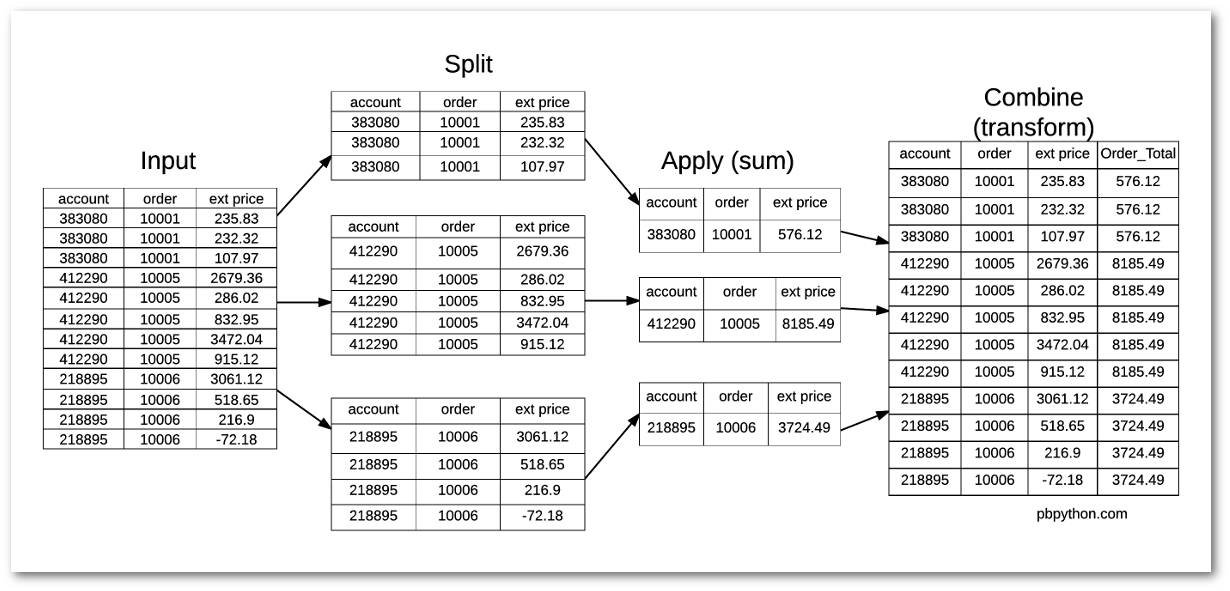

In [101]:
display(Image(os.path.join('../datasets/','Figs', 'transform-example.png'), width=700))

## Second Example: Vehicles Database

The framework I came up with, pictured below, consists of a Prep Phase and an Explore Phase. Each phase has several steps in it that we will walk through together as we progress through this series.

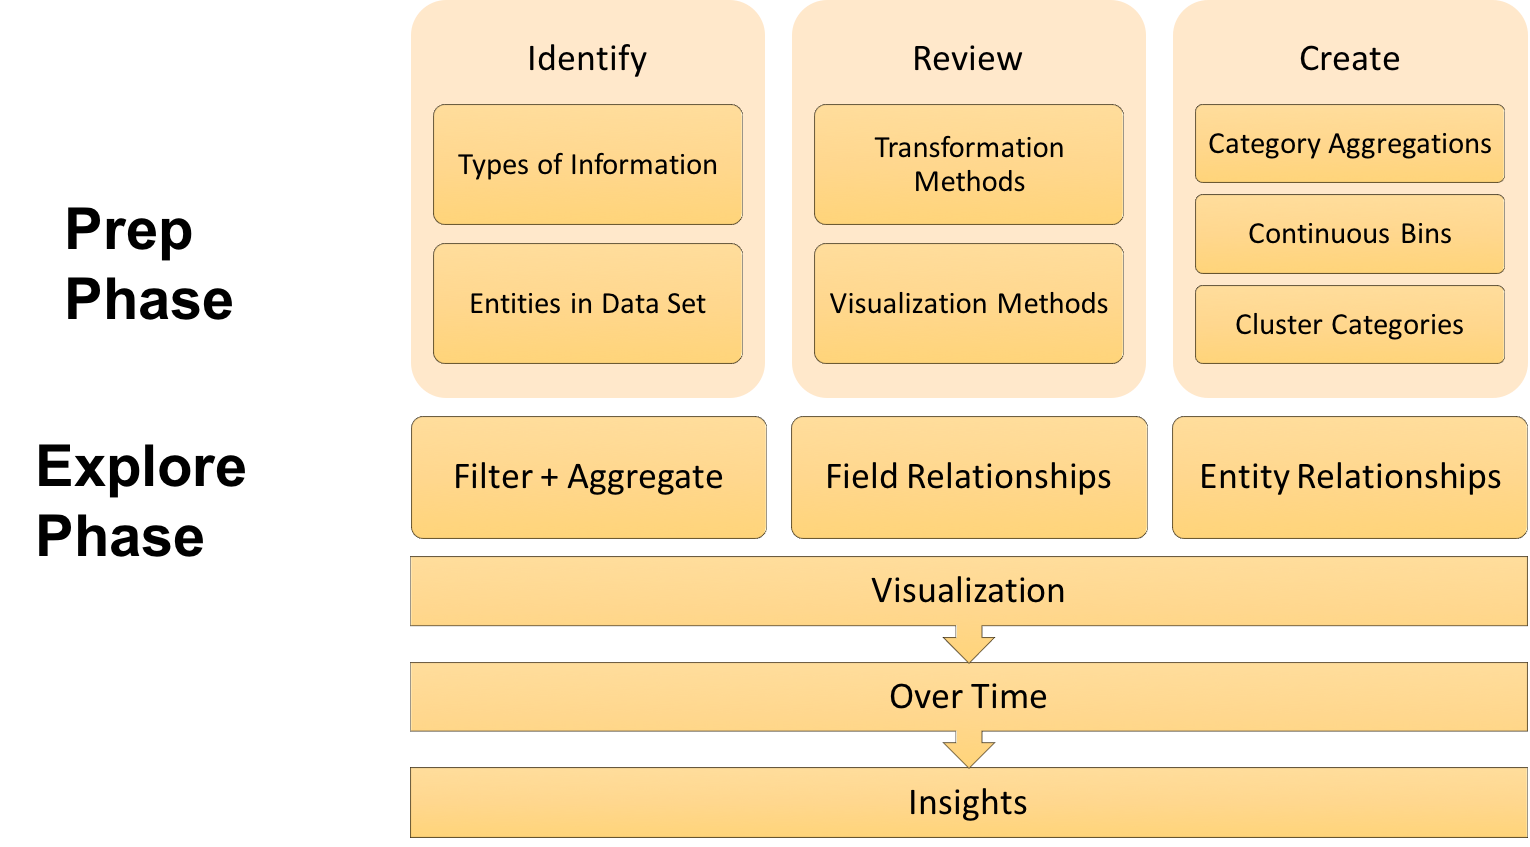

In [102]:
display(Image(os.path.join('../datasets/','Figs', 'framework.png'), width=700))

In [103]:
with zipfile.ZipFile('{0}.zip'.format(os.path.join(datapath,'Miscellaneous',zipname)), 'r') as myzip:
    with myzip.open('vehicles.csv') as myfile:
        df_vehicles = pd.read_csv(myfile)
        
df_vehicles.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (70,71,72,73,74,76,79) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.696,0.000,0.000,0.000,19,0.000,0,0.000,0.000,0.000,...,NaN,NaN,0.000,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.965,0.000,0.000,0.000,9,0.000,0,0.000,0.000,0.000,...,NaN,NaN,0.000,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.208,0.000,0.000,0.000,23,0.000,0,0.000,0.000,0.000,...,NaN,NaN,0.000,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
3,29.965,0.000,0.000,0.000,10,0.000,0,0.000,0.000,0.000,...,NaN,NaN,0.000,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
4,17.348,0.000,0.000,0.000,17,0.000,0,0.000,0.000,0.000,...,NaN,NaN,0.000,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


In [104]:
df_vehicles.columns

Index(['barrels08', 'barrelsA08', 'charge120', 'charge240', 'city08',
       'city08U', 'cityA08', 'cityA08U', 'cityCD', 'cityE', 'cityUF', 'co2',
       'co2A', 'co2TailpipeAGpm', 'co2TailpipeGpm', 'comb08', 'comb08U',
       'combA08', 'combA08U', 'combE', 'combinedCD', 'combinedUF', 'cylinders',
       'displ', 'drive', 'engId', 'eng_dscr', 'feScore', 'fuelCost08',
       'fuelCostA08', 'fuelType', 'fuelType1', 'ghgScore', 'ghgScoreA',
       'highway08', 'highway08U', 'highwayA08', 'highwayA08U', 'highwayCD',
       'highwayE', 'highwayUF', 'hlv', 'hpv', 'id', 'lv2', 'lv4', 'make',
       'model', 'mpgData', 'phevBlended', 'pv2', 'pv4', 'range', 'rangeCity',
       'rangeCityA', 'rangeHwy', 'rangeHwyA', 'trany', 'UCity', 'UCityA',
       'UHighway', 'UHighwayA', 'VClass', 'year', 'youSaveSpend', 'guzzler',
       'trans_dscr', 'tCharger', 'sCharger', 'atvType', 'fuelType2', 'rangeA',
       'evMotor', 'mfrCode', 'c240Dscr', 'charge240b', 'c240bDscr',
       'createdOn', 'modifiedOn

We are going to clean it up by dropping columns we don't need, removing vehicles that are coming out in the future, removing any duplicate records, and then sorting the data by make, model, and year.

In [105]:
select_columns = ['make', 'model', 'year', 'displ', 'cylinders', 'trany', 'drive', 'VClass',
                  'fuelType','barrels08', 'city08', 'highway08', 'comb08', 'co2TailpipeGpm', 
                  'fuelCost08']

df_vehicles = df_vehicles[select_columns][df_vehicles.year <= 2016].drop_duplicates().dropna()
df_vehicles = df_vehicles.sort_values(['make', 'model', 'year'])

#### Identify Stage

Now that we have a clean data set, let's jump into the framework, beginning with the Prep Phase. The first thing we're going to do is identify the types of information contained in our data set, which will help us get to know our data a bit better and prepare us to think about the data in different ways. After that, we will identify the entities in our data set so that we are aware of the different levels to which we can aggregate up or drill down.
Types of Information

There are a few distinct types of information that jump out at us just from taking a quick look at the data set.

    Vehicle attributes information
    Vehicle manufacturer information
    Engine information
    Fuel information (such as fuel efficiency, fuel type, and fuel cost)
    Transmission information
    Drive axle information

There are also some other types of information in our data that may not be as obvious. Since we have the year the vehicle was manufactured, we can observe changes in the data over time. We also have relationship information in the data, both between fields and between the entities. And since we have both a time variable as well as information about relationships, we can learn how those relationships have changed over time.

#### Entities in the Data

The next step in the Prep Phase is to identify the entities in our data. Now, what exactly do I mean by entities? When I refer to entities, I'm referring to the individual, analyzable units in a data set. To conduct any type of analysis, you need to be able to distinguish one entity from another and identify differences between them. Entities are also usually part of some hierarchical structure where they can be aggregated into one or more systems, or higher-level entities, to which they belong. Now that we have defined what an entity is, let's take a look at the different levels of them that are present in our data set.

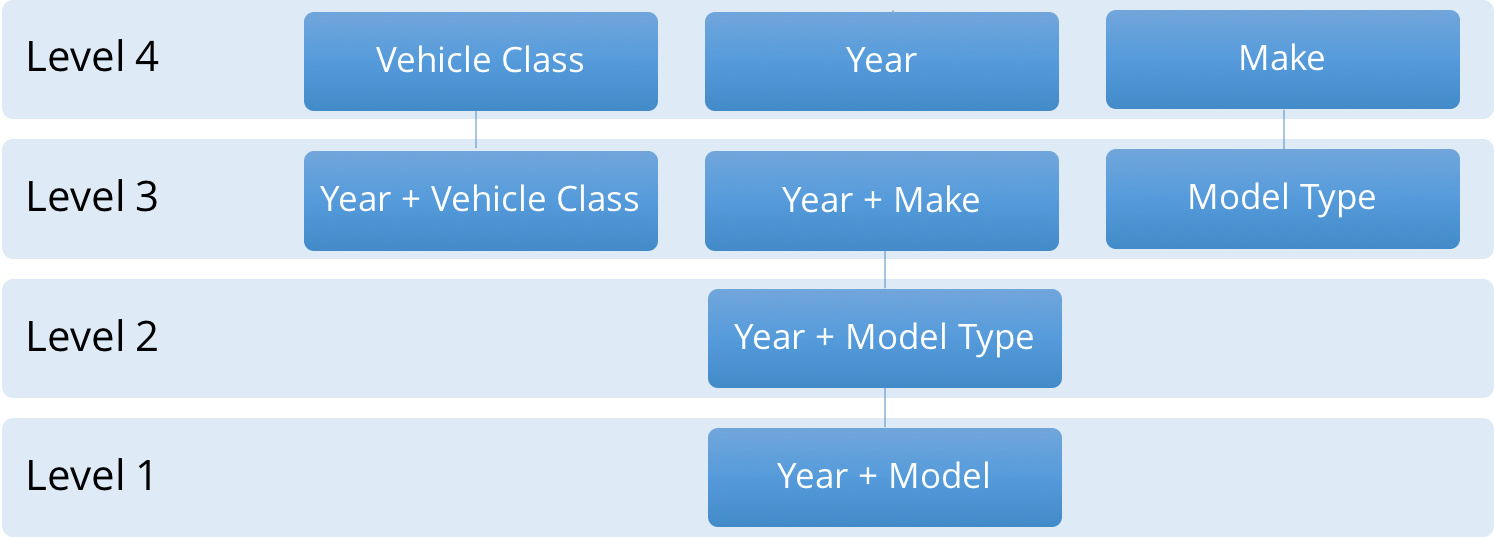

In [106]:
display(Image(os.path.join('../datasets/','Figs', 'entities1.png'), width=1000))

Beginning at Level 1 (which is the most granular level in the data) - you can see the year and specific model of vehicle. The next level we can aggregate up to from there is year and model type, which is slightly less granular. From there, we have a few different directions we can pursue: year and vehicle class, year and make, or we can remove year and only keep model type. Finally, at Level 4, we can further aggregate the data to just the vehicle classes, the years, or the makes.

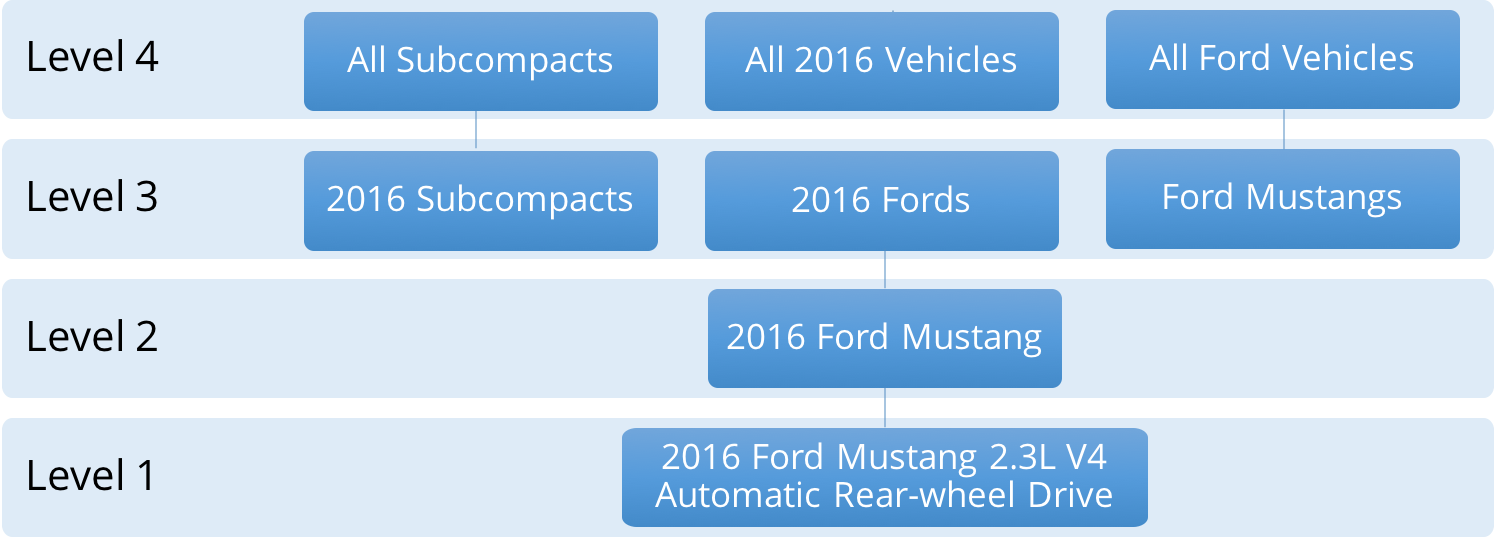

In [107]:
display(Image(os.path.join('../datasets/','Figs', 'entities2.png'), width=1000))

At Level 1, which was the year and the model, we have a 2016 Ford Mustang with a 2.3 liter V4 engine, automatic transmission, and rear-wheel drive. At Level 2, we can roll things up and look at all 2016 Ford Mustangs as one entity that we're analyzing. Then at Level 3, we can either make our entities all 2016 Subcompact Cars, all 2016 Fords, or all Ford Mustangs regardless of the year they were manufactured. From there, we can continue going up the hierarchy.

Again, doing this is important, and it will help you think about all the things you can do to the data and all the different ways you can look at it later on. I see a lot of people that are new to data science who don't do this. They don't think about their data this way, and because of that, they end up missing valuable insights that they would have otherwise discovered. I hope that these examples help make it easier to think about data this way.

#### Review Stage

The next step in the Prep Phase is to review some transformation and visualization methods. Doing this will ensure that we are aware of the tools we have in our analytic arsenal, what they should be used for, and when to utilize each one.
Transformation Methods

The first methods we will cover are the transformation methods. Let's take a look at some of my favorite ways to transform data.

    Filtering
    Aggregation/Disaggregation
    Pivoting
    Graph Transformation

The first method I have listed here is Filtering, which is making the data set smaller by looking at either fewer rows, fewer columns, or both. The next method on the list is Aggregation/Disaggregation. This is the process of changing the levels at which you are analyzing the data, getting either more or less granular. Then we have Pivoting, which is the process of aggregating by multiple variables along two axes - the rows and the columns. Finally, we have Graph Transformation, which is the process of linking your entities based on shared attributes and examining how they relate to one another.

By transforming the data, you are ultimately altering its structure, which allows you to look at it from several perspectives. And just like looking at anything else from different perspectives, you will learn something new from each way that you view it. The remarkable thing about this is that the number of ways you can transform the data is limited only by your creativity and your imagination. This, for me, is one of the most exciting things about working with data - all the things you can do to it and all the creative ways that you can transform it.
Visualization Methods

In addition to transforming the data, I also like to go a step further and visualize it, as sometimes the transformations you perform can be difficult to interpret. Converting your transformations to visualizations allows you to bring the human visual cortex into your analytical process, and I often find that this helps me find more insights faster, since the visual component of it makes the insights jump right out at me.

Because of this, transformation and visualization go hand-in-hand. Since there are a variety of ways to transform data, there are also several ways you can visualize it. I like to keep things relatively simple, so here are some of the visualization methods I use most often.

    Bar charts
    Multi-line Graphs
    Scatter plots/matrices
    Heatmaps
    Network Visualizations

The first visualization method on the list is Bar charts, which help you intuitively view aggregations by comparing the size or magnitude of higher-level entities in the data. Bar charts are simple, but they can be very useful, which is why they are one of the most popular types of visualization methods. Next, we have Multi-line Graphs, which are usually used to show changes over time or some other measure, where each line typically represents a higher-level entity whose behavior you are comparing.

The third method on the list is a combination of Scatter Plots and Scatter Matrices. Using scatter plots, you can view relationships and correlations between two numeric variables in your data set at a time. Scatter matrices are simply a matrix of scatter plots, so they allow you to view the relationships and correlations between all your numeric variables in a single visualization.

The fourth visualization method listed are Heatmaps, which allow you to view the concentration, magnitude, or other calculated value of entities that fall into different combinations of categories in your data. Last, but certainly not least, we have Network Visualizations, which bring graph transformations to life and let you visualize relationships between the entities in your data via a collection of visual nodes and edges.

#### Renaming Collumns

In [108]:
df_vehicles.columns = ['Make','Model','Year','Engine Displacement','Cylinders',
                       'Transmission','Drivetrain','Vehicle Class','Fuel Type',
                       'Fuel Barrels/Year','City MPG','Highway MPG','Combined MPG',
                       'CO2 Emission Grams/Mile','Fuel Cost/Year']

#### Thinking About Categorization

Now that we have changed our column names to be more intuitive, let's take a moment to think about what categorization is and examine the categories that currently exist in our data set. At the most basic level, categorization is just a way that humans structure information — how we hierarchically create order out of complexity. Categories are formed based on attributes that entities have in common, and they present us with different perspectives from which we can view and think about our data.

Our primary objective in this stage is to create additional categories that will help us further organize our data. This will prove beneficial not only for the exploratory analysis we will conduct but also for any supervised machine learning or modeling that may happen further down the data science pipeline. Seasoned data scientists know that the better your data is organized, the better downstream analyses you will be able to perform and the more informative features you will have to feed into your machine learning models.

In this stage of the framework, we are going to create additional categories in 3 distinct ways:

    Category Aggregations
    Binning Continuous Variables
    Clustering

Now that we have a better idea of what we are doing and why, let's get started.
Aggregating to Higher-Level Categories

The first way we are going to create additional categories is by identifying opportunities to create higher-level categories out of the variables we already have in our data set. In order to do this, we need to get a sense of what categories currently exist in the data. We can do this by iterating through our columns and printing out the name, the number of unique values, and the data type for each.

In [109]:
df_vehicles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35095 entries, 19316 to 29609
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     35095 non-null  object 
 1   Model                    35095 non-null  object 
 2   Year                     35095 non-null  int64  
 3   Engine Displacement      35095 non-null  float64
 4   Cylinders                35095 non-null  float64
 5   Transmission             35095 non-null  object 
 6   Drivetrain               35095 non-null  object 
 7   Vehicle Class            35095 non-null  object 
 8   Fuel Type                35095 non-null  object 
 9   Fuel Barrels/Year        35095 non-null  float64
 10  City MPG                 35095 non-null  int64  
 11  Highway MPG              35095 non-null  int64  
 12  Combined MPG             35095 non-null  int64  
 13  CO2 Emission Grams/Mile  35095 non-null  float64
 14  Fuel Cost/Year    

In [110]:
def unique_col_values(df):
    for column in df:
        print("{} | {} | {}".format(
            df[column].name, len(df[column].unique()), df[column].dtype
        ))

unique_col_values(df_vehicles)

Make | 126 | object
Model | 3490 | object
Year | 33 | int64
Engine Displacement | 65 | float64
Cylinders | 9 | float64
Transmission | 44 | object
Drivetrain | 7 | object
Vehicle Class | 34 | object
Fuel Type | 13 | object
Fuel Barrels/Year | 116 | float64
City MPG | 48 | int64
Highway MPG | 49 | int64
Combined MPG | 46 | int64
CO2 Emission Grams/Mile | 550 | float64
Fuel Cost/Year | 55 | int64


From looking at the output, it is clear that we have some numeric columns (int64 and float64) and some categorical columns (object). For now, let's focus on the six categorical columns in our data set.

    Make: 126 unique values
    Model: 3,491 unique values
    Transmission: 43 unique values
    Drivetrain: 7 unique values
    Vehicle Class: 34 unique values
    Fuel Type: 13 unique values

When aggregating and summarizing data, having too many categories can be problematic. The average human is said to have the ability to hold 7 objects at a time in their short-term working memory. Accordingly, I have noticed that once you exceed 8-10 discrete values in a category, it becomes increasingly difficult to get a holistic picture of how the entire data set is divided up.

What we want to do is examine the values in each of our categorical variables to determine where opportunities exist to aggregate them into higher-level categories. The way this is typically done is by using a combination of clues from the current categories and any domain knowledge you may have (or be able to acquire).

For example, imagine aggregating by Transmission, which has 43 discrete values in our data set. It is going to be difficult to derive insights due to the fact that any aggregated metrics are going to be distributed across more categories than you can hold in short-term memory. However, if we examine the different transmission categories with the goal of finding common features that we can group on, we would find that all 43 values fall into one of two transmission types, Automatic or Manual.

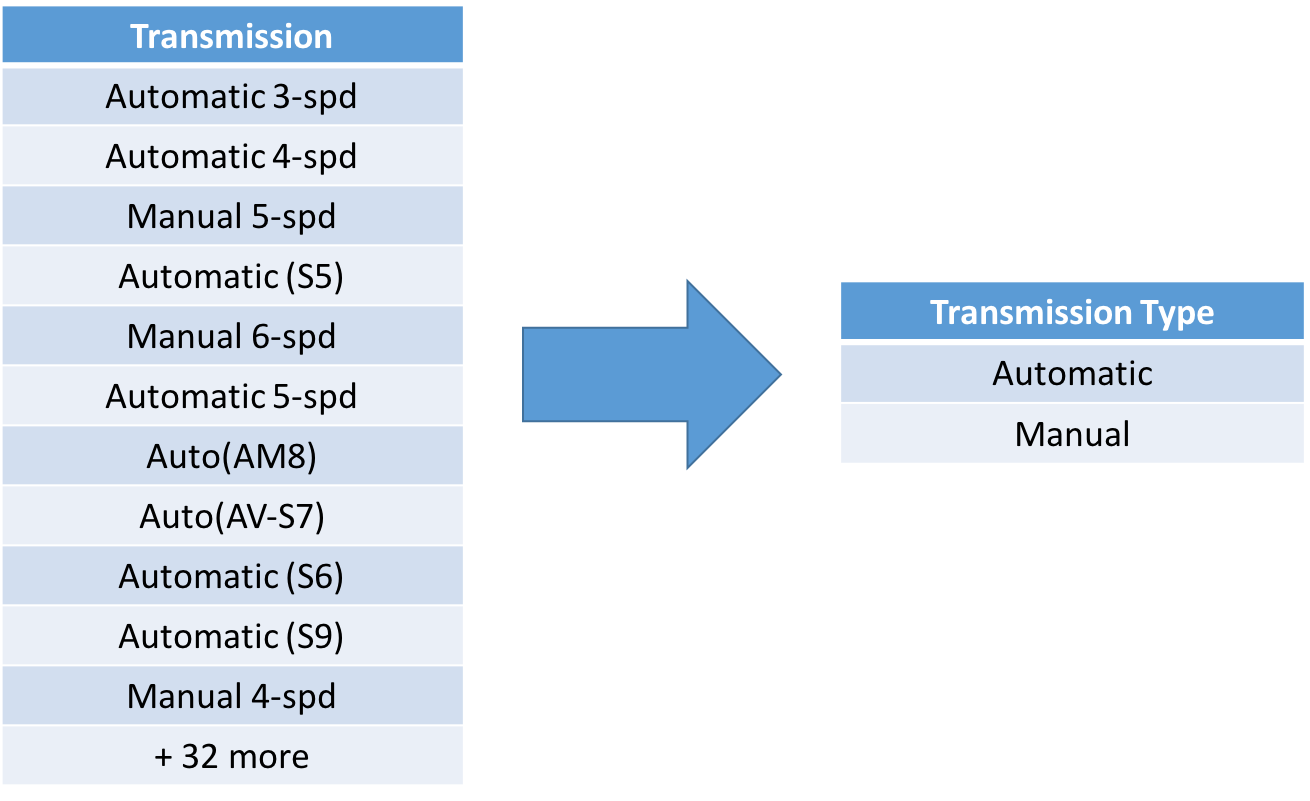

In [111]:
display(Image(os.path.join('../datasets/','Figs', 'transmission.png'), width=1000))

Let's create a new Transmission Type column in our data frame and, with the help of the loc method in pandas, assign it a value of Automatic where the first character of Transmission is the letter A and a value of Manual where the first character is the letter M.

In [112]:
df_vehicles.loc[df_vehicles['Transmission'].str.startswith('A'), 'Transmission Type'] = "Automatic"
df_vehicles.loc[df_vehicles['Transmission'].str.startswith('M'), 'Transmission Type'] = "Manual"

We can apply the same logic to the Vehicle Class field. We originally have 34 vehicle classes, but we can distill those down into 8 vehicle categories, which are much easier to remember.

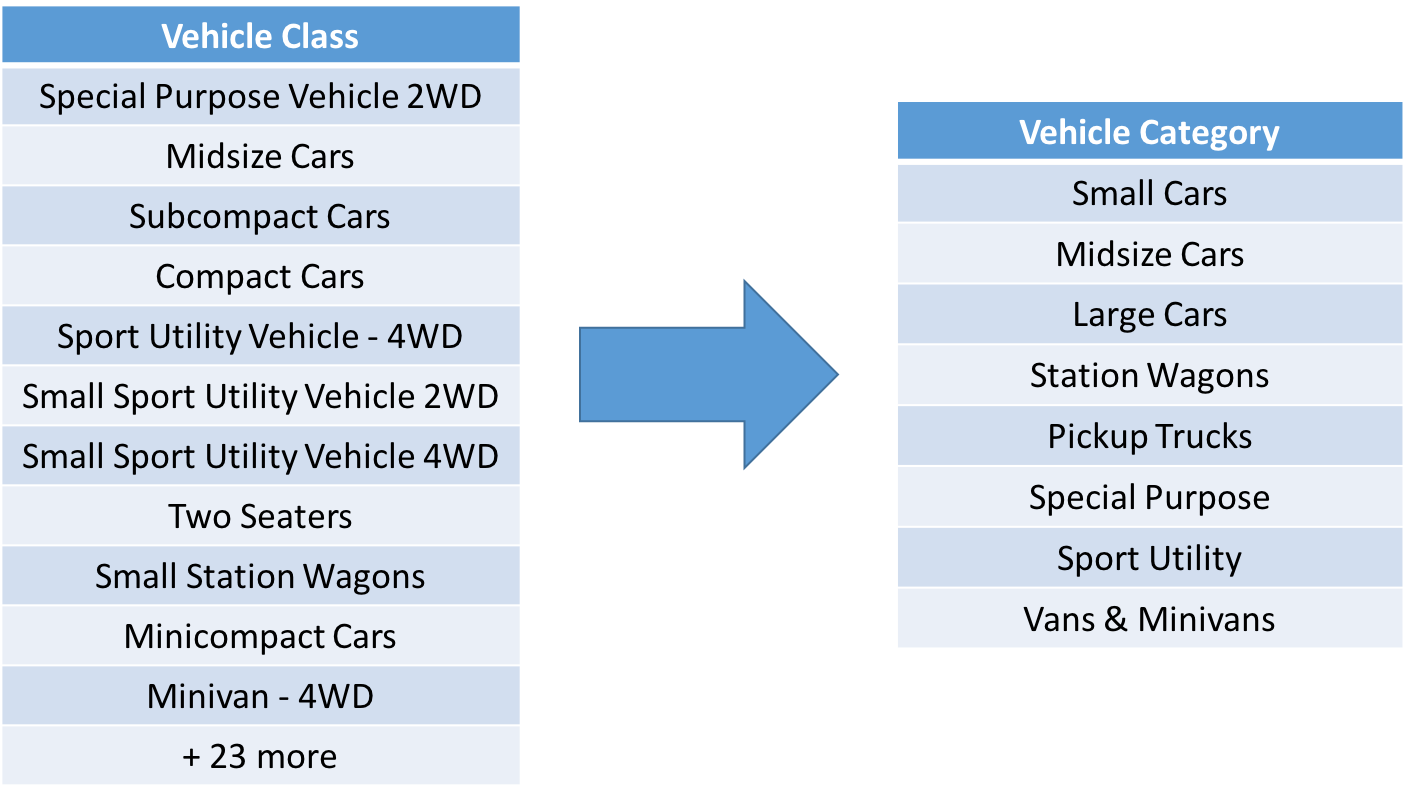

In [113]:
display(Image(os.path.join('../datasets/','Figs','vehicle_class.png'), width=1000))

In [114]:
small = ['Compact Cars','Subcompact Cars','Two Seaters','Minicompact Cars']
midsize = ['Midsize Cars']
large = ['Large Cars']

df_vehicles.loc[df_vehicles['Vehicle Class'].isin(small), 'Vehicle Category'] = 'Small Cars'
df_vehicles.loc[df_vehicles['Vehicle Class'].isin(midsize), 'Vehicle Category'] = 'Midsize Cars'
df_vehicles.loc[df_vehicles['Vehicle Class'].isin(large), 'Vehicle Category'] = 'Large Cars'
df_vehicles.loc[df_vehicles['Vehicle Class'].str.contains('Station'), 'Vehicle Category'] = 'Station Wagons'
df_vehicles.loc[df_vehicles['Vehicle Class'].str.contains('Truck'), 'Vehicle Category'] = 'Pickup Trucks'
df_vehicles.loc[df_vehicles['Vehicle Class'].str.contains('Special Purpose'), 'Vehicle Category'] = 'Special Purpose'
df_vehicles.loc[df_vehicles['Vehicle Class'].str.contains('Sport Utility'), 'Vehicle Category'] = 'Sport Utility'
df_vehicles.loc[(df_vehicles['Vehicle Class'].str.lower().str.contains('van')), 'Vehicle Category'] = 'Vans & Minivans'

Next, let's look at the Make and Model fields, which have 126 and 3,491 unique values respectively. While I can't think of a way to get either of those down to 8-10 categories, we can create another potentially informative field by concatenating Make and the first word of the Model field together into a new Model Type field. This would allow us to, for example, categorize all Chevrolet Suburban C1500 2WD vehicles and all Chevrolet Suburban K1500 4WD vehicles as simply Chevrolet Suburbans.

In [115]:
df_vehicles['Model Type'] = (df_vehicles['Make'] + " " + df_vehicles['Model'].str.split().str.get(0))

Finally, let's look at the Fuel Type field, which has 13 unique values. On the surface, that doesn't seem too bad, but upon further inspection, you'll notice some complexity embedded in the categories that could probably be organized more intuitively.

In [116]:
df_vehicles['Fuel Type'].unique()

array(['Regular', 'Premium', 'Diesel', 'Premium and Electricity',
       'Premium or E85', 'Premium Gas or Electricity', 'Gasoline or E85',
       'Gasoline or natural gas', 'CNG', 'Regular Gas or Electricity',
       'Midgrade', 'Regular Gas and Electricity', 'Gasoline or propane'],
      dtype=object)

This is interesting and a little tricky because there are some categories that contain a single fuel type and others that contain multiple fuel types. In order to organize this better, we will create two sets of categories from these fuel types. The first will be a set of columns that will be able to represent the different combinations, while still preserving the individual fuel types.

In [117]:
df_vehicles['Gas'] = 0
df_vehicles['Ethanol'] = 0
df_vehicles['Electric'] = 0
df_vehicles['Propane'] = 0
df_vehicles['Natural Gas'] = 0

df_vehicles.loc[df_vehicles['Fuel Type'].str.contains('Regular|Gasoline|Midgrade|Premium|Diesel'),'Gas'] = 1
df_vehicles.loc[df_vehicles['Fuel Type'].str.contains('E85'),'Ethanol'] = 1
df_vehicles.loc[df_vehicles['Fuel Type'].str.contains('Electricity'),'Electric'] = 1
df_vehicles.loc[df_vehicles['Fuel Type'].str.contains('propane'),'Propane'] = 1
df_vehicles.loc[df_vehicles['Fuel Type'].str.contains('natural|CNG'),'Natural Gas'] = 1

As it turns out, 99% of the vehicles in our database have gas as a fuel type, either by itself or combined with another fuel type. Since that is the case, let's create a second set of categories - specifically, a new Gas Type field that extracts the type of gas (Regular, Midgrade, Premium, Diesel, or Natural) each vehicle accepts.

In [118]:
df_vehicles.loc[df_vehicles['Fuel Type'].str.contains('Regular|Gasoline'),'Gas Type'] = 'Regular'
df_vehicles.loc[df_vehicles['Fuel Type'] == 'Midgrade','Gas Type'] = 'Midgrade'
df_vehicles.loc[df_vehicles['Fuel Type'].str.contains('Premium'),'Gas Type'] = 'Premium'
df_vehicles.loc[df_vehicles['Fuel Type'] == 'Diesel','Gas Type'] = 'Diesel'
df_vehicles.loc[df_vehicles['Fuel Type'].str.contains('natural|CNG'),'Gas Type'] = 'Natural'

An important thing to note about what we have done with all of the categorical fields in this section is that, while we created new categories, we did not overwrite the original ones. We created additional fields that will allow us to view the information contained within the data set at different (often higher) levels. If you need to drill down to the more granular original categories, you can always do that. However, now we have a choice whereas before we performed these category aggregations, we did not.

#### Creating Categories from Continuous Variables

The next way we can create additional categories in our data is by binning some of our continuous variables - breaking them up into different categories based on a threshold or distribution. There are multiple ways you can do this, but I like to use quintiles because it gives me one middle category, two categories outside of that which are moderately higher and lower, and then two extreme categories at the ends. I find that this is a very intuitive way to break things up and provides some consistency across categories. In our data set, I've identified 4 fields that we can bin this way.

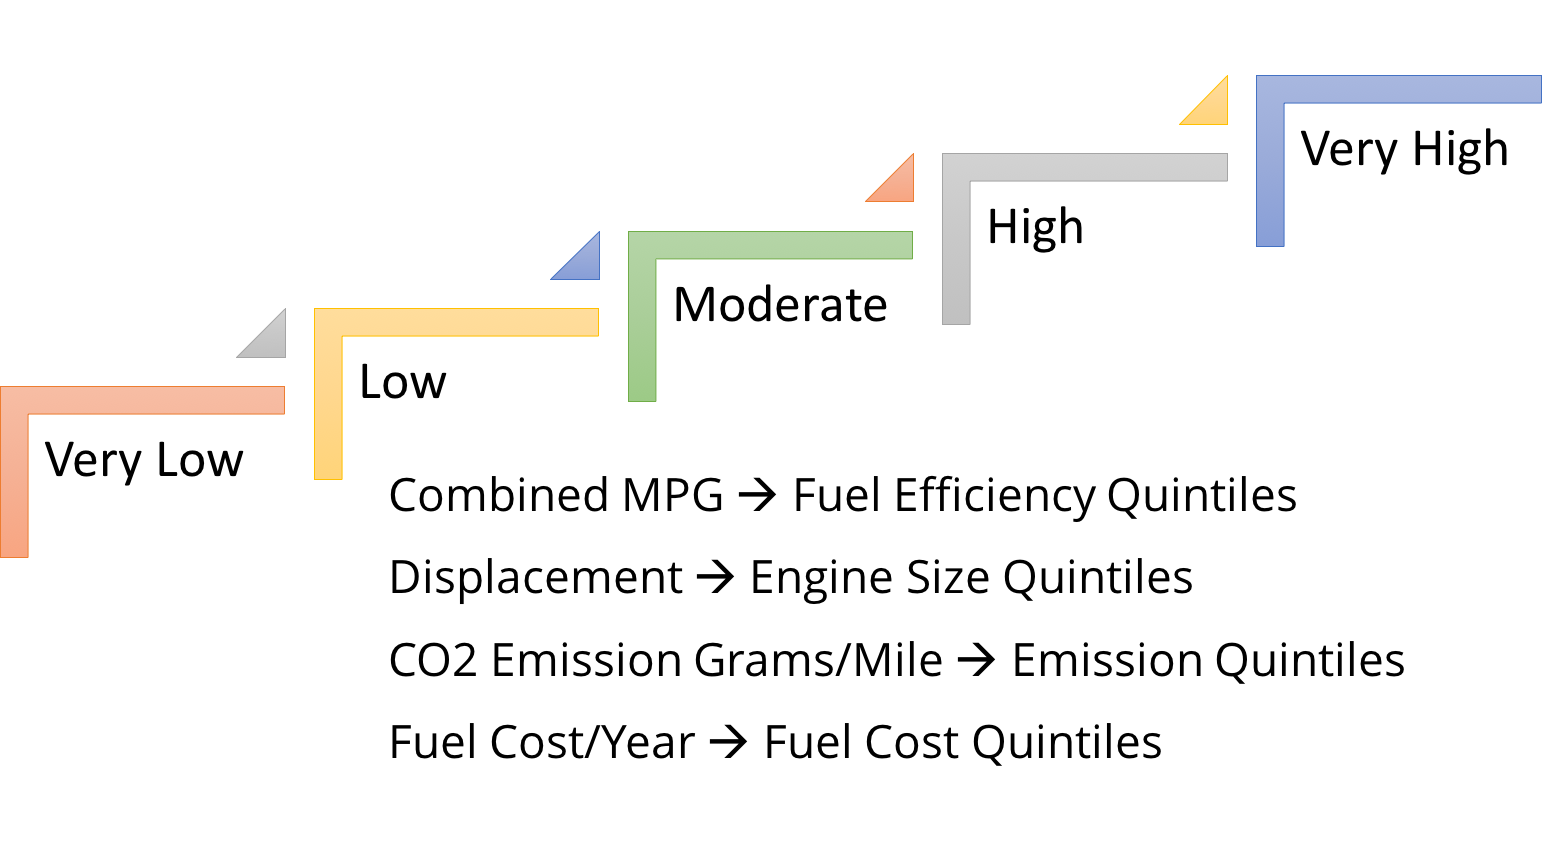

In [119]:
display(Image(os.path.join('../datasets/','Figs', 'binning.png'), width=800))

Binning essentially looks at how the data is distributed, creates the necessary number of bins by splitting up the range of values (either equally or based on explicit boundaries), and then categorizes records into the appropriate bin that their continuous value falls into. Pandas has a qcut method that makes binning extremely easy, so let's use that to create our quintiles for each of the continuous variables we identified.

In [120]:
efficiency_categories = ['Very Low Efficiency', 'Low Efficiency','Moderate Efficiency',
                         'High Efficiency','Very High Efficiency']
df_vehicles['Fuel Efficiency'] = pd.qcut(df_vehicles['Combined MPG'], 5, efficiency_categories)


engine_categories = ['Very Small Engine', 'Small Engine','Moderate Engine', 'Large Engine', 'Very Large Engine']
df_vehicles['Engine Size'] = pd.qcut(df_vehicles['Engine Displacement'], 5, engine_categories)


emission_categories = ['Very Low Emissions', 'Low Emissions', 'Moderate Emissions',
                       'High Emissions', 'Very High Emissions']
df_vehicles['Emissions'] = pd.qcut(df_vehicles['CO2 Emission Grams/Mile'], 5, emission_categories)


fuelcost_categories = ['Very Low Fuel Cost', 'Low Fuel Cost', 'Moderate Fuel Cost',
                       'High Fuel Cost','Very High Fuel Cost']
df_vehicles['Fuel Cost'] = pd.qcut(df_vehicles['Fuel Cost/Year'], 5, fuelcost_categories)

#### Clustering to Create Additional Categories

The final way we are going to prepare our data is by clustering to create additional categories. There are a few reasons why I like to use clustering for this. First, it takes multiple fields into consideration together at the same time, whereas the other categorization methods only consider one field at a time. This will allow you to categorize together entities that are similar across a variety of attributes, but might not be close enough in each individual attribute to get grouped together.

Clustering also creates new categories for you automatically, which takes much less time than having to comb through the data yourself identifying patterns across attributes that you can form categories on. It will automatically group similar items together for you.

The third reason I like to use clustering is because it will sometimes group things in ways that you, as a human, may not have thought of. I'm a big fan of humans and machines working together to optimize analytical processes, and this is a good example of value that machines bring to the table that can be helpful to humans. I'll write more about my thoughts on that in future posts, but for now, let's move on to clustering our data.

The first thing we are going to do is isolate the columns we want to use for clustering. These are going to be columns with numeric values, as the clustering algorithm will need to compute distances in order to group similar vehicles together.

In [121]:
cluster_columns = ['Engine Displacement','Cylinders','Fuel Barrels/Year', 'City MPG','Highway MPG',
                   'Combined MPG', 'CO2 Emission Grams/Mile', 'Fuel Cost/Year']

Next, we want to scale the features we are going to cluster on. There are a variety of ways to normalize and scale variables, but I'm going to keep things relatively simple and just use Scikit-Learn's MaxAbsScaler, which will divide each value by the max absolute value for that feature. This will preserve the distributions in the data and convert the values in each field to a number between 0 and 1 (technically -1 and 1, but we don't have any negatives).

In [122]:
from sklearn import preprocessing
scaler = preprocessing.MaxAbsScaler()

df_vehicle_clusters = scaler.fit_transform(df_vehicles[cluster_columns])
df_vehicle_clusters = pd.DataFrame(df_vehicle_clusters, columns=cluster_columns)

Now that our features are scaled, let's write a couple of functions. The first function we are going to write is a kmeans_cluster function that will k-means cluster a given data frame into a specified number of clusters. It will then return a copy of the original data frame with those clusters appended in a column named Cluster.

In [123]:
from sklearn.cluster import KMeans

def kmeans_cluster(df, n_clusters=2):
    model = KMeans(n_clusters=n_clusters, random_state=1)
    clusters = model.fit_predict(df)
    cluster_results = df.copy()
    cluster_results['Cluster'] = clusters
    return cluster_results

Our second function, called summarize_clustering is going to count the number of vehicles that fall into each cluster and calculate the cluster means for each feature. It is going to merge the counts and means into a single data frame and then return that summary to us.

In [124]:
def summarize_clustering(results):
    cluster_size = results.groupby(['Cluster']).size().reset_index()
    cluster_size.columns = ['Cluster', 'Count']
    cluster_means = results.groupby(['Cluster'], as_index=False).mean()
    cluster_summary = pd.merge(cluster_size, cluster_means, on='Cluster')
    return cluster_summary

We now have functions for what we need to do, so the next step is to actually cluster our data. But wait, our kmeans_cluster function is supposed to accept a number of clusters. How do we determine how many clusters we want?

There are a number of approaches for figuring this out, but for the sake of simplicity, we are just going to plug in a couple of numbers and visualize the results to arrive at a good enough estimate. Remember earlier in this post where we were trying to aggregate our categorical variables to less than 8-10 discrete values? We are going to apply the same logic here. Let's start out with 8 clusters and see what kind of results we get.

In [125]:
cluster_results = kmeans_cluster(df_vehicle_clusters, 8)
cluster_summary = summarize_clustering(cluster_results)

In [126]:
cluster_summary.head(10)

,Cluster,Count,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,0,7704,0.383,0.375,0.354,0.297,0.405,0.356,0.354,0.315
1,1,4780,0.447,0.373,0.438,0.250,0.310,0.287,0.438,0.371
2,2,1716,0.682,0.571,0.601,0.178,0.235,0.210,0.601,0.544
3,3,6333,0.242,0.254,0.281,0.383,0.487,0.447,0.281,0.240
4,4,5837,0.267,0.254,0.346,0.315,0.392,0.364,0.346,0.299
5,5,1828,0.201,0.245,0.216,0.518,0.617,0.588,0.217,0.183
6,6,2914,0.596,0.500,0.396,0.263,0.361,0.316,0.400,0.364
7,7,3983,0.632,0.502,0.495,0.218,0.282,0.255,0.496,0.423


By looking at the Count column, you can tell that there are some clusters that have significantly more records in them (ex. Cluster 7) and others that have significantly fewer (ex. Cluster 3). Other than that, though, it is difficult to notice anything informative about the summary. I don't know about you, but to me, the rest of the summary just looks like a bunch of decimals in a table.

This is a prime opportunity to use a visualization to discover insights faster. With just a couple import statements and a single line of code, we can light this summary up in a heatmap so that we can see the contrast between all those decimals and between the different clusters.

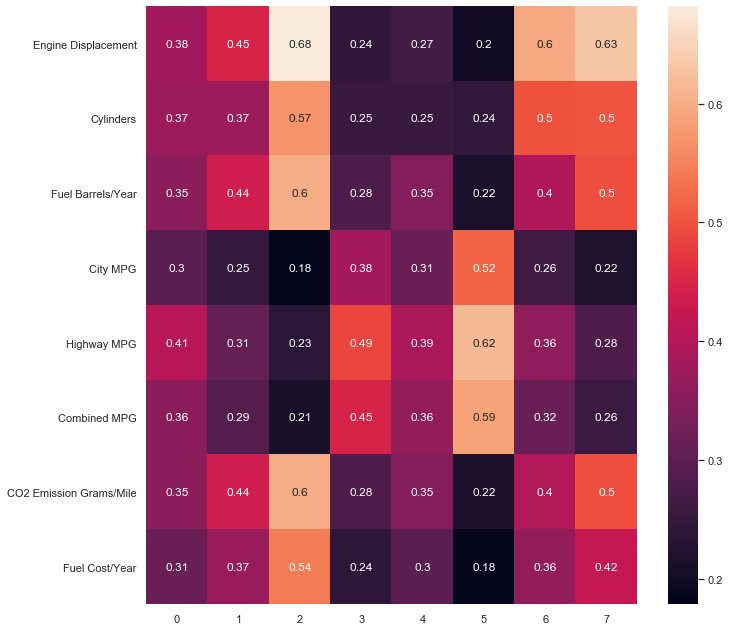

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(11,11)})
sns.heatmap(cluster_summary[cluster_columns].transpose(), annot=True,)

In this heatmap, the rows represent the features and the columns represent the clusters, so we can compare how similar or differently columns look to each other. Our goal for clustering these features is to ultimately create meaningful categories out of the clusters, so we want to get to the point where we can clearly distinguish one from the others. This heatmap allows us to do this quickly and visually.

With this goal in mind, it is apparent that we probably have too many clusters because:

    Clusters 3, 4, and 7 look pretty similar
    Clusters 2 and 5 look similar as well
    Clusters 0 and 6 are also a little close for comfort

From the way our heatmap currently looks, I'm willing to bet that we can cut the number of clusters in half and get clearer boundaries. Let's re-run the clustering, summary, and heatmap code for 4 clusters and see what kind of results we get.

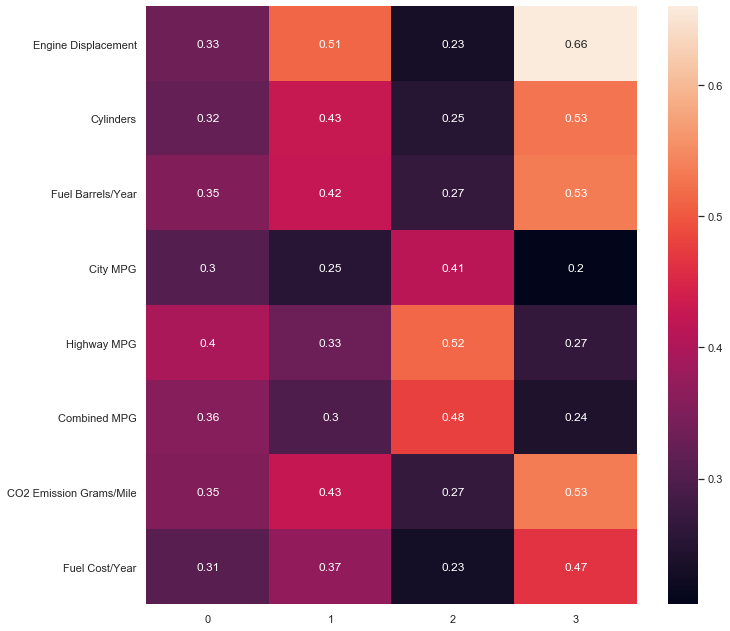

In [128]:
cluster_results = kmeans_cluster(df_vehicle_clusters, 4)
cluster_summary = summarize_clustering(cluster_results)

sns.heatmap(cluster_summary[cluster_columns].transpose(), annot=True)

These clusters look more distinct, don't they? Clusters 1 and 3 look like they are polar opposites of each other, cluster 0 looks like it’s pretty well balanced across all the features, and cluster 2 looks like it’s about half-way between Cluster 0 and Cluster 1.

We now have a good number of clusters, but we still have a problem. It is difficult to remember what clusters 0, 1, 2, and 3 mean, so as a next step, I like to assign descriptive names to the clusters based on their properties. In order to do this, we need to look at the levels of each feature for each cluster and come up with intuitive natural language descriptions for them. You can have some fun and can get as creative as you want here, but just keep in mind that the objective is for you to be able to remember the characteristics of whatever label you assign to the clusters.

    Cluster 1 vehicles seem to have large engines that consume a lot of fuel, process it inefficiently, produce a lot of emissions, and cost a lot to fill up. I'm going to label them Large Inefficient.
    Cluster 3 vehicles have small, fuel efficient engines that don't produce a lot of emissions and are relatively inexpensive to fill up. I'm going to label them Small Very Efficient.
    Cluster 0 vehicles are fairly balanced across every category, so I'm going to label them Midsized Balanced.
    Cluster 2 vehicles have large engines but are more moderately efficient than the vehicles in Cluster 1, so I'm going to label them Large Moderately Efficient.

Now that we have come up with these descriptive names for our clusters, let's add a Cluster Name column to our cluster_results data frame, and then copy the cluster names over to our original vehicles data frame.



In [129]:
cluster_results['Cluster Name'] = ''
cluster_results['Cluster Name'][cluster_results['Cluster']==0] = 'Midsized Balanced'
cluster_results['Cluster Name'][cluster_results['Cluster']==1] = 'Large Inefficient'
cluster_results['Cluster Name'][cluster_results['Cluster']==2] = 'Large Moderately Efficient'
cluster_results['Cluster Name'][cluster_results['Cluster']==3] = 'Small Very Efficient'

df_vehicles = df_vehicles.reset_index().drop('index', axis=1)
df_vehicles['Cluster Name'] = cluster_results['Cluster Name']

#https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing t

We will begin with the cleaned and prepped vehicle fuel economy data set that we ended up with at the end of the last post. This version of the data set contains:

    The higher-level categories we created via category aggregations.
    The quintiles we created by binning our continuous variables.
    The clusters we generated via k-means clustering based on numeric variables.

Now, without further ado, let's embark on our insight-finding mission!

#### Making Our Data Smaller: Filter + Aggregate

One of the fundamental ways to extract insights from a data set is to reduce the size of the data so that you can look at just a piece of it at a time. There are two ways to do this: filtering and aggregating. With filtering, you are essentially removing either rows or columns (or both rows and columns) in order to focus on a subset of the data that interests you. With aggregation, the objective is to group records in your data set that have similar categorical attributes and then perform some calculation (count, sum, mean, etc.) on one or more numerical fields so that you can observe and identify differences between records that fall into each group.

To begin filtering and aggregating our data set, we could write a function like the one below to aggregate based on a group_field that we provide, counting the number of rows in each group. To make things more intuitive and easier to interpret, we will also sort the data from most frequent to least and format it in a pandas data frame with appropriate column names. 

In [130]:
def agg_count(df, group_field):
    grouped = df.groupby(group_field, as_index=False).size()
    grouped.sort_values(ascending = False, inplace=True)

    grouped = pd.DataFrame(grouped).reset_index()
    grouped.columns = [group_field, 'Count']
    return grouped

Now that we have this function in our toolkit, let's use it. Suppose we were looking at the Vehicle Category field in our data set and were curious about the number of vehicles in each category that were manufactured last year (2016). Here is how we would filter the data and use the agg_count function to transform it to show what we wanted to know. 

In [131]:
vehicles_2016 = df_vehicles[df_vehicles['Year'] == 2016]
category_counts = agg_count(vehicles_2016, 'Vehicle Category')
category_counts.head(8)

,Vehicle Category,Count
0,Small Cars,440
1,Sport Utility,319
2,Midsize Cars,201
3,Large Cars,100
4,Pickup Trucks,83
5,Station Wagons,44
6,Special Purpose,24
7,Vans & Minivans,17


#### Filter Aggregate Count

This gives us what we want in tabular form, but we could take it a step further and visualize it with a horizontal bar chart. 

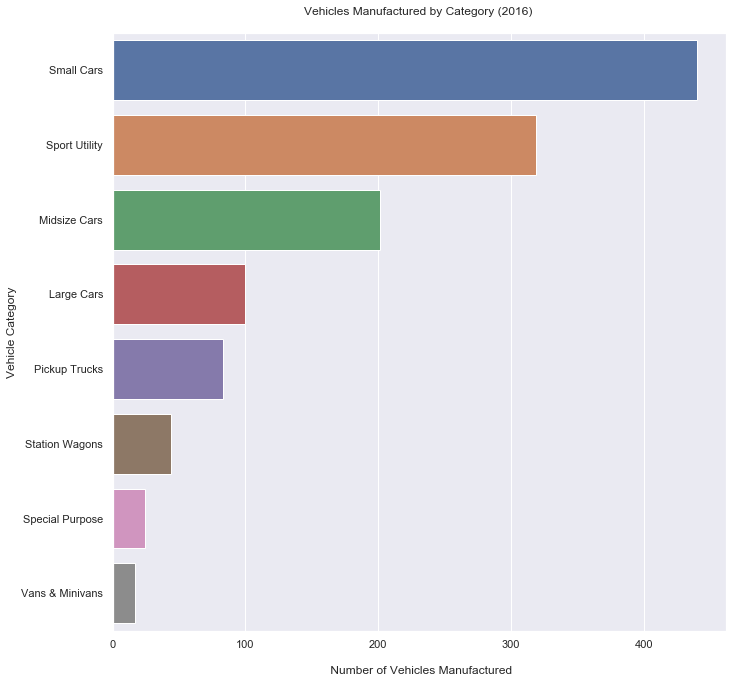

In [132]:
ax = sns.barplot(data=category_counts, x='Count', y='Vehicle Category')
ax.set(xlabel='\n Number of Vehicles Manufactured')
ax.set_title('Vehicles Manufactured by Category (2016) \n');

Now that we know how to do this, we can filter, aggregate, and plot just about anything in our data set with just a few lines of code. For example, here is the same metric but filtered for a different year (1985). 

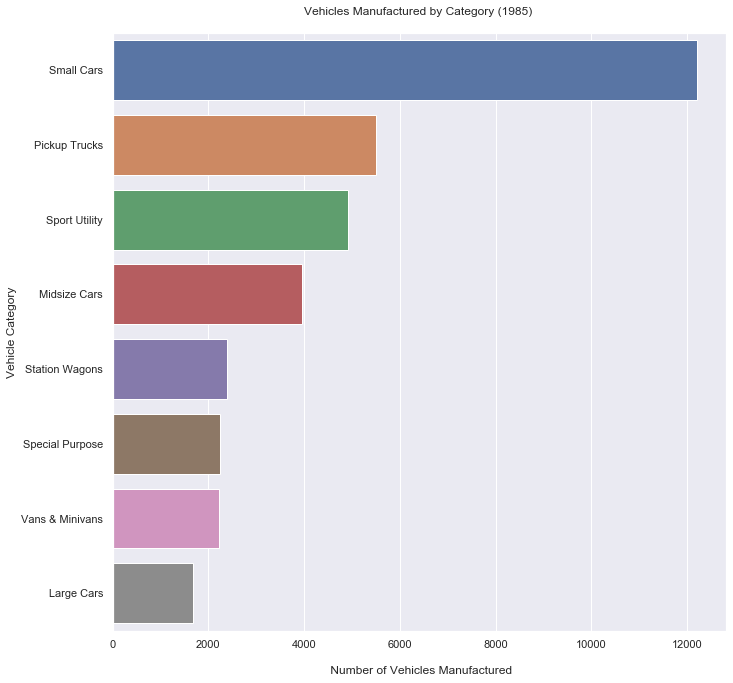

In [133]:
vehicles_1985 = df_vehicles[df_vehicles['Year']==1985]
category_counts = agg_count(df_vehicles, 'Vehicle Category')

ax = sns.barplot(data=category_counts, x='Count', y='Vehicle Category')
ax.set(xlabel='\n Number of Vehicles Manufactured')
ax.set_title('Vehicles Manufactured by Category (1985) \n');

If we wanted to stick with the year 2016 but drill down to the more granular Vehicle Class, we could do that as well. 

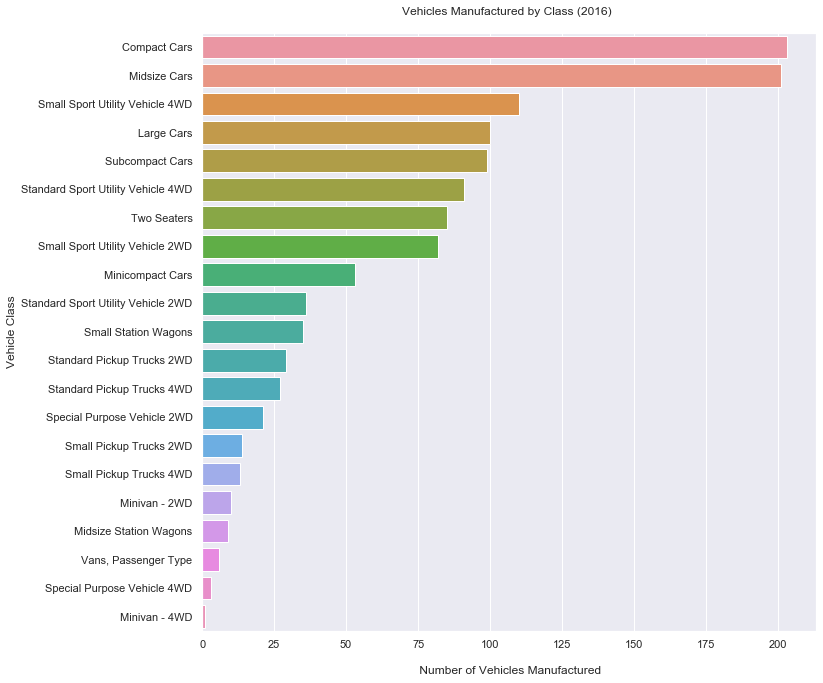

In [134]:
class_counts = agg_count(vehicles_2016, 'Vehicle Class')

ax = sns.barplot(data=class_counts, x='Count', y='Vehicle Class')
ax.set(xlabel='\n Number of Vehicles Manufactured')
ax.set_title('Vehicles Manufactured by Class (2016) \n');

We could also look at vehicle counts by manufacturer. 

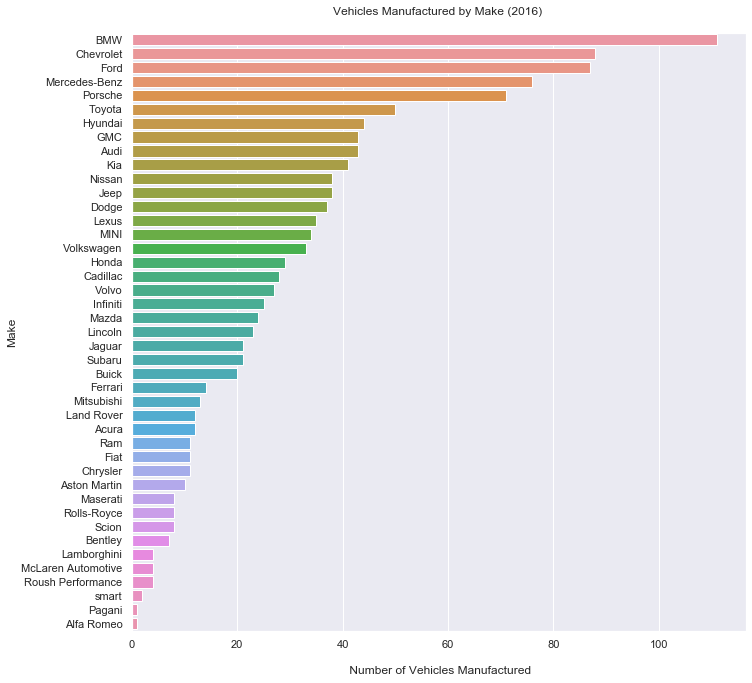

In [135]:
make_counts = agg_count(vehicles_2016, 'Make')

ax = sns.barplot(data=make_counts, x='Count', y='Make')
ax.set(xlabel='\n Number of Vehicles Manufactured')
ax.set_title('Vehicles Manufactured by Make (2016) \n');

What if we wanted to filter by something other than the year? We could do that by simply creating a different filtered data frame and passing that to our agg_count function. Below, instead of filtering by Year, I've filtered on the Fuel Efficiency field, which contains the fuel efficiency quintiles we generated in the last post. Let's choose the Very High Efficiency value so that we can see how many very efficient vehicles each manufacturer has made. 

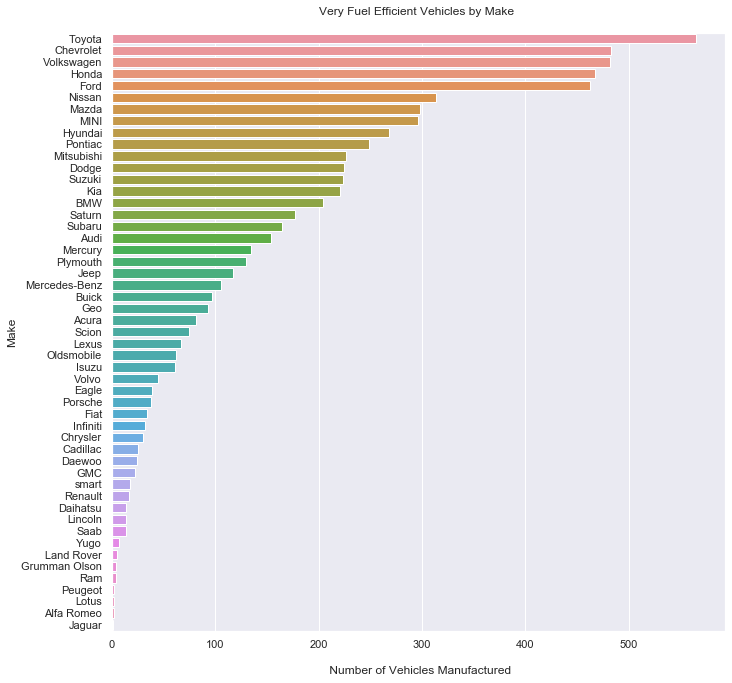

In [136]:
very_efficient = df_vehicles[df_vehicles['Fuel Efficiency']=='Very High Efficiency']
make_counts = agg_count(very_efficient, 'Make')

ax = sns.barplot(data=make_counts, x='Count', y='Make')
ax.set(xlabel='\n Number of Vehicles Manufactured')
ax.set_title('Very Fuel Efficient Vehicles by Make \n');

What if we wanted to perform some other calculation, such as averaging, instead of counting the number of records that fall into each group? We can just create a new function called agg_avg that calculates the mean of a designated numerical field.

In [137]:
def agg_avg(df, group_field, calc_field):
    grouped = df.groupby(group_field, as_index=False)[calc_field].mean()
    grouped = grouped.sort_values(by=calc_field, ascending = False)
    grouped.columns = [group_field, 'Avg ' + str(calc_field)]
    return grouped

We can then simply swap out the agg_count function with our new agg_avg function and indicate what field we would like to use for our calculation. Below is an example showing the average fuel efficiency, represented by the Combined MPG field, by vehicle category. 

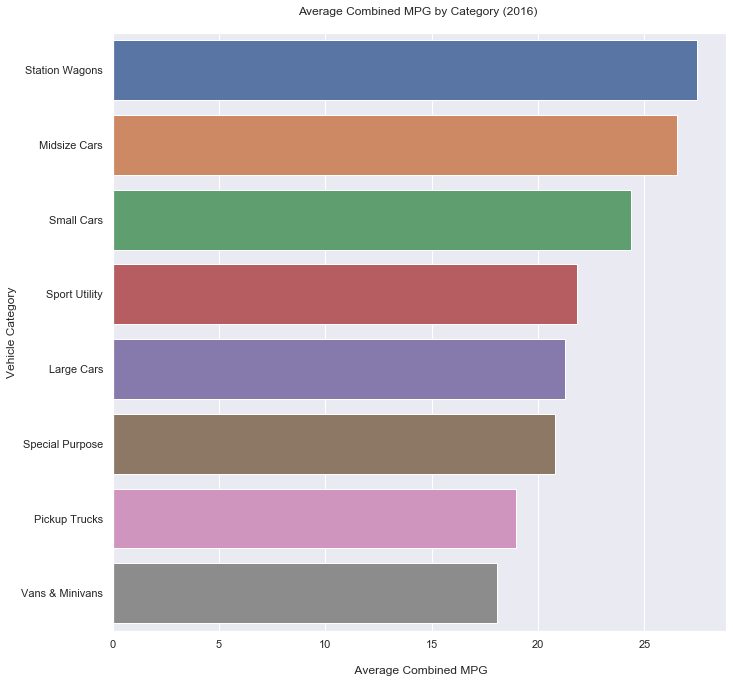

In [138]:
category_avg_mpg = agg_avg(vehicles_2016, 'Vehicle Category', 'Combined MPG')

ax = sns.barplot(data=category_avg_mpg, x='Avg Combined MPG', y='Vehicle Category')
ax.set(xlabel='\n Average Combined MPG')
ax.set_title('Average Combined MPG by Category (2016) \n');

#### Pivoting the Data for More Detail

Up until this point, we've been looking at our data at a pretty high level, aggregating up by a single variable. Sure, we were able to drill down from Vehicle Category to Vehicle Class to get a more granular view, but we only looked at the data one hierarchical level at a time. Next, we're going to go into further detail by taking a look at two or three variables at a time. The way we are going to do this is via pivot tables and their visual equivalents, pivot heatmaps.

First, we will create a pivot_count function, similar to the agg_count function we created earlier, that will transform whatever data frame we feed it into a pivot table with the rows, columns, and calculated field we specify. 

In [139]:
def pivot_count(df, rows, columns, calc_field):
    df_pivot = df.pivot_table(values=calc_field, 
                              index=rows, 
                              columns=columns, 
                              aggfunc=np.size
                             ).dropna(axis=0, how='all')
    return df_pivot

We will then use this function on our vehicles_2016 data frame and pivot it out with the Fuel Efficiency quintiles we created in the last post representing the rows, the Engine Size quintiles representing the columns, and then counting the number of vehicles that had a Combined MPG value. 

In [140]:
effic_size_pivot = pivot_count(vehicles_2016,'Fuel Efficiency','Engine Size','Combined MPG')
effic_size_pivot.head(10)

Engine Size,Very Small Engine,Small Engine,Moderate Engine,Large Engine,Very Large Engine
Fuel Efficiency,,,,,
Very Low Efficiency,nan,nan,4.000,23.000,72.000
Low Efficiency,nan,nan,18.000,49.000,81.000
Moderate Efficiency,nan,2.000,62.000,76.000,21.000
High Efficiency,33.000,42.000,135.000,67.000,2.000
Very High Efficiency,373.000,97.000,69.000,2.000,nan


This is OK, but it would be faster to analyze visually. Let's create a heatmap that will color the magnitude of the counts and present us with a more intuitive view. 

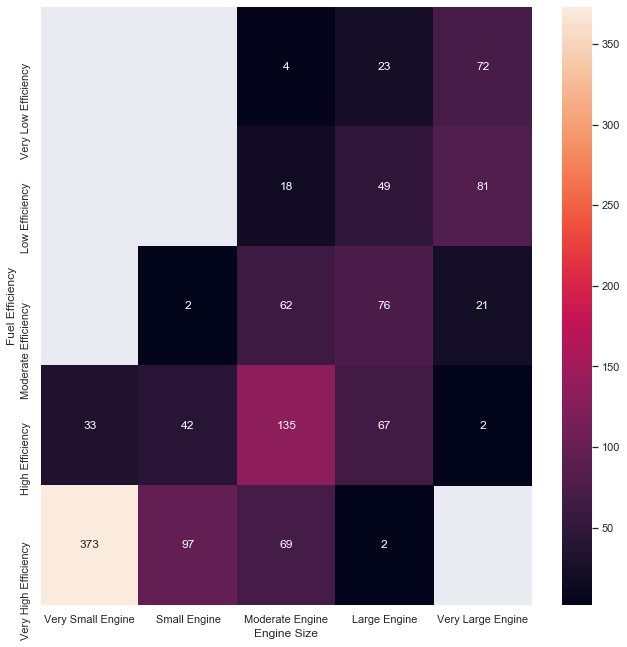

In [141]:
sns.heatmap(effic_size_pivot, annot=True, fmt='g')
ax.set(xlabel='\n Engine Size')
ax.set_title('Fuel Efficiency vs. Engine Size (2016) \n');

Just like we did earlier with our horizontal bar charts, we can easily filter by a different year and get a different perspective. For example, here's what this heatmap looks like for 1985.

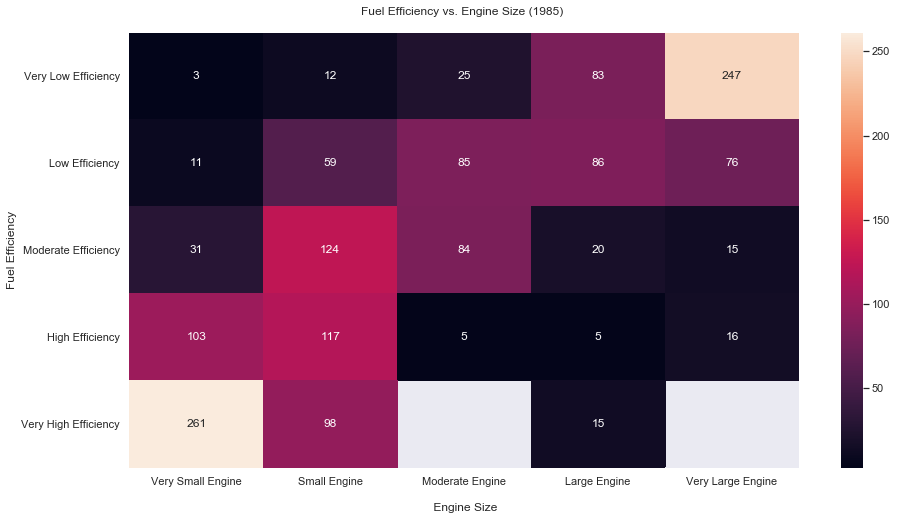

In [142]:
effic_size_pivot = pivot_count(vehicles_1985,'Fuel Efficiency',
                               'Engine Size','Combined MPG')

fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(effic_size_pivot, annot=True, fmt='g')
ax.set(xlabel='\n Engine Size')
ax.set_title('Fuel Efficiency vs. Engine Size (1985) \n');

With these pivot heatmaps, we are not limited to just two variables. We can pass a list of variables for any of the axes (rows or columns), and it will display all the different combinations of values for those variables. 

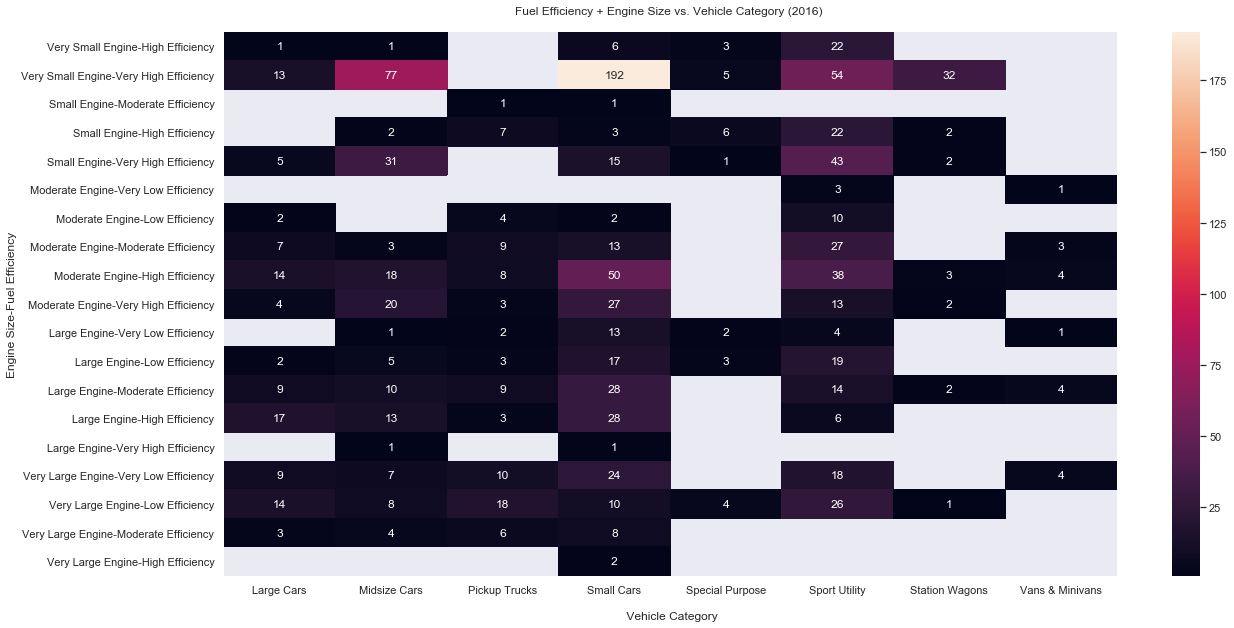

In [143]:
effic_size_category = pivot_count(vehicles_2016,
                                  ['Engine Size','Fuel Efficiency'],
                                  'Vehicle Category','Combined MPG')

fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(effic_size_category, annot=True, fmt='g')
ax.set(xlabel='\n Vehicle Category')
ax.set_title('Fuel Efficiency + Engine Size vs. Vehicle Category (2016) \n');

In this heatmap, we have Engine Size and Fuel Efficiency combinations represented by the rows, and we've added a third variable (the Vehicle Category) across the columns. So now we can see a finer level of detail about what types of cars had what size engines and what level of fuel efficiency last year.

As a final example for this section, let's create a pivot heatmap that plots Make against Vehicle Category for 2016. We saw earlier, in the bar chart that counted vehicles by manufacturer, that BMW made the largest number of specific models last year. This pivot heatmap will let us see how those counts are distributed across vehicle categories, giving us a better sense of each auto company's current offerings in terms of the breadth vs. depth of vehicle types they make.

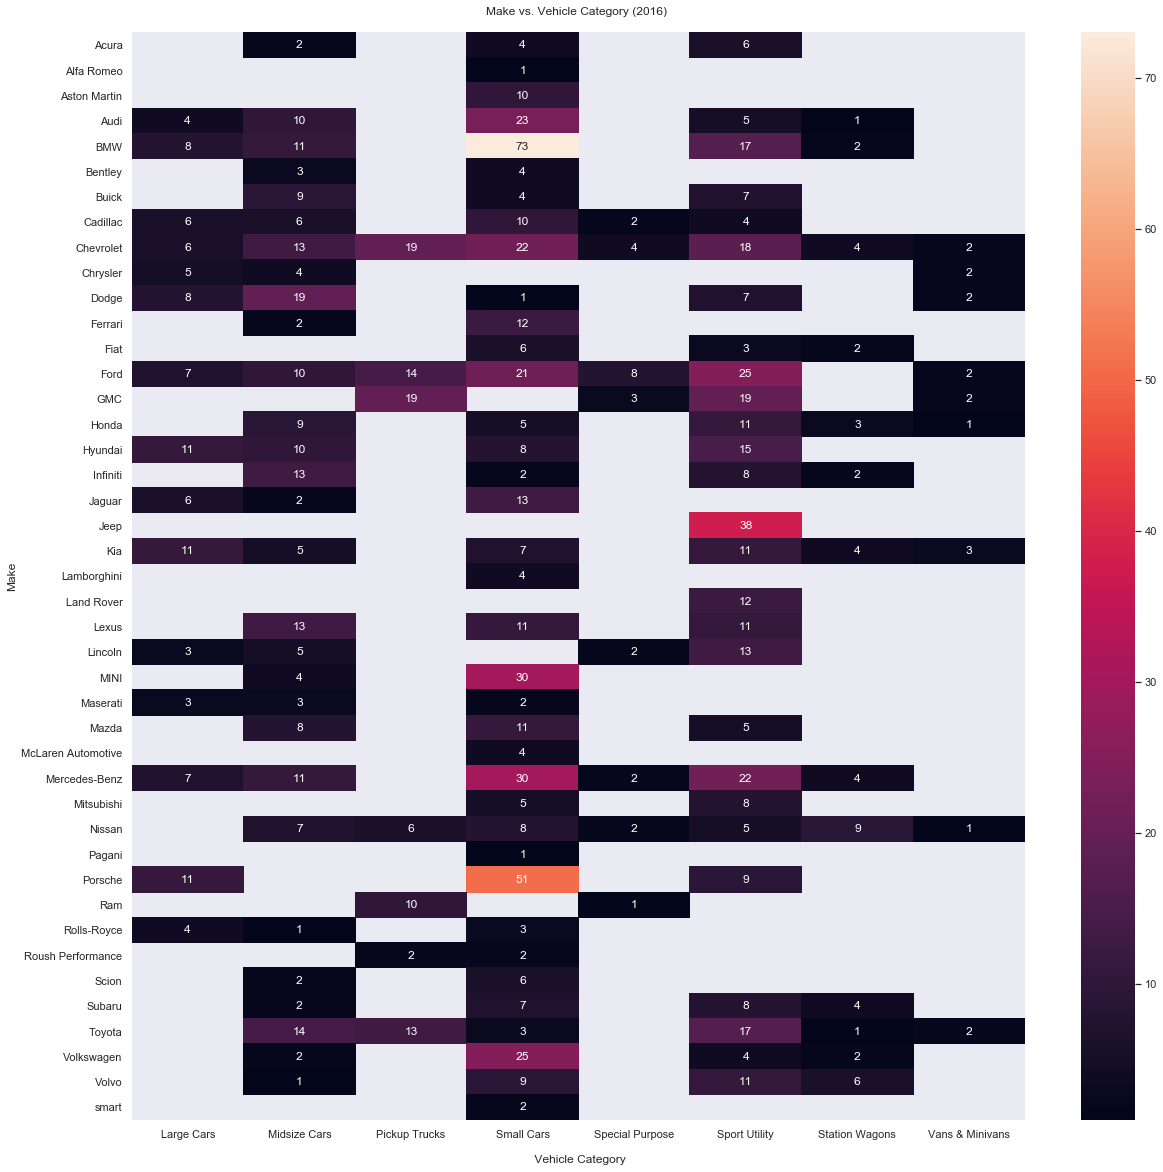

In [144]:
effic_size_pivot = pivot_count(vehicles_2016, 'Make',
                               'Vehicle Category','Combined MPG')

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(effic_size_pivot, annot=True, fmt='g')
ax.set(xlabel='\n Vehicle Category')
ax.set_title('Make vs. Vehicle Category (2016) \n');

#### Visualizing Changes Over Time

So far in this post, we've been looking at the data at given points in time. The next step is to take a look at how the data has changed over time. We can do this relatively easily by creating a multi_line function that accepts a data frame and x/y fields and then plots them on a multiline chart. 

In [145]:
def multi_line(df, x, y):
    ax = df.groupby([x, y]).size().unstack(y).plot(figsize=(15,8), cmap="Set2")

Let's use this function to visualize our vehicle categories over time. The resulting chart shows the number of vehicles in each category that were manufactured each year. 

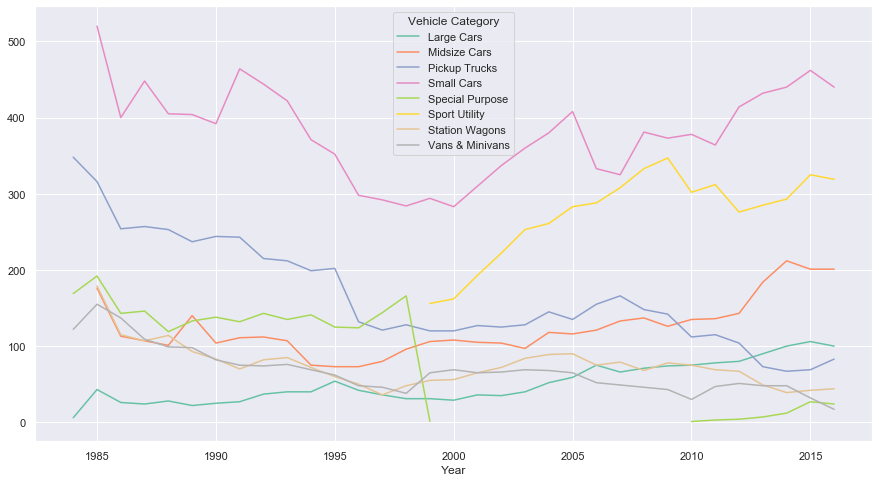

In [146]:
multi_line(df_vehicles, 'Year', 'Vehicle Category')
ax.set(xlabel='\n Year')
ax.set_title('Vehicle Categories Over Time \n');

We can see from the chart that Small Cars have generally dominated across the board and that there was a small decline in the late 90s that then started to pick up again in the early 2000s. We can also see the introduction and increase in popularity of SUVs starting in the late 90s, and the decline in popularity of trucks in recent years.

If we wanted to, we could zoom in and filter for specific manufacturers to see how their offerings have changed over the years. Since BMW had the most number of vehicles last year and we saw in the pivot heatmap that those were mostly small cars, let's filter for just their vehicles to see whether they have always made a lot of small cars or if this is more of a recent phenomenon. 

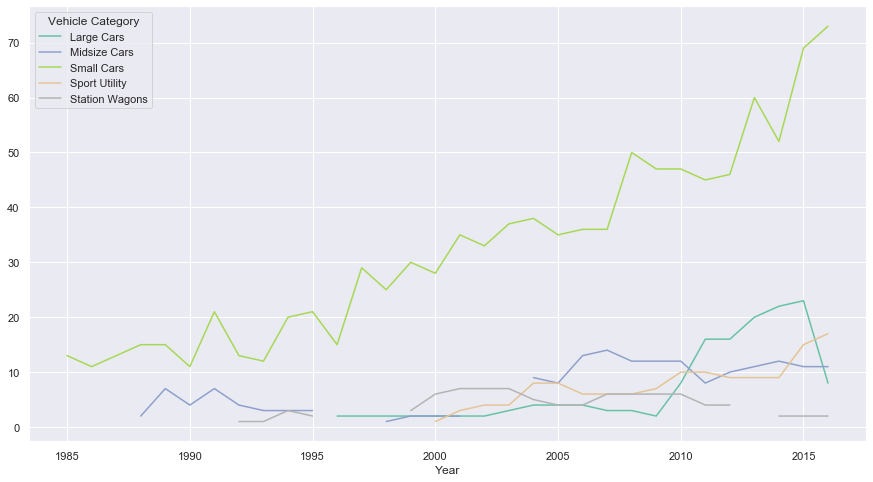

In [147]:
bmw = df_vehicles[df_vehicles['Make'] == 'BMW']

multi_line(bmw, 'Year', 'Vehicle Category')
ax.set(xlabel='\n Year')
ax.set_title('BMW Vehicle Categories Over Time \n');

We can see in the chart above that they started off making a reasonable number of small cars, and then seemed to ramp up production of those types of vehicles in the late 90s. We can contrast this with a company like Toyota, who started out making a lot of small cars back in the 1980s and then seemingly made a decision to gradually manufacture less of them over the years, focusing instead on SUVs, pickup trucks, and midsize cars.

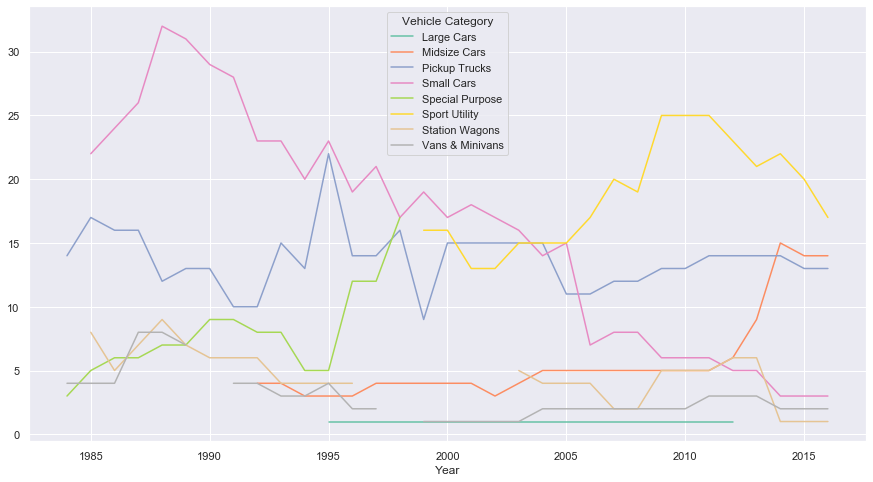

In [148]:
toyota = df_vehicles[df_vehicles['Make'] == 'Toyota']

multi_line(toyota, 'Year', 'Vehicle Category')
ax.set(xlabel='\n Year')
ax.set_title('Toyota Vehicle Categories Over Time \n');

#### Examining Relationships Between Variables

The final way we are going to explore our data in this post is by examining the relationships between numerical variables in our data. Doing this will provide us with better insight into which fields are highly correlated, what the nature of those correlations are, what typical combinations of numerical values exist in our data, and which combinations are anomalies.

For looking at relationships between variables, I often like to start with a scatter matrix because it gives me a bird's eye view of the relationships between all the numerical fields in my data set. With just a couple lines of code, we can not only create a scatter matrix, but we can also factor in a layer of color that can represent, for example, the clusters we generated earlier.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

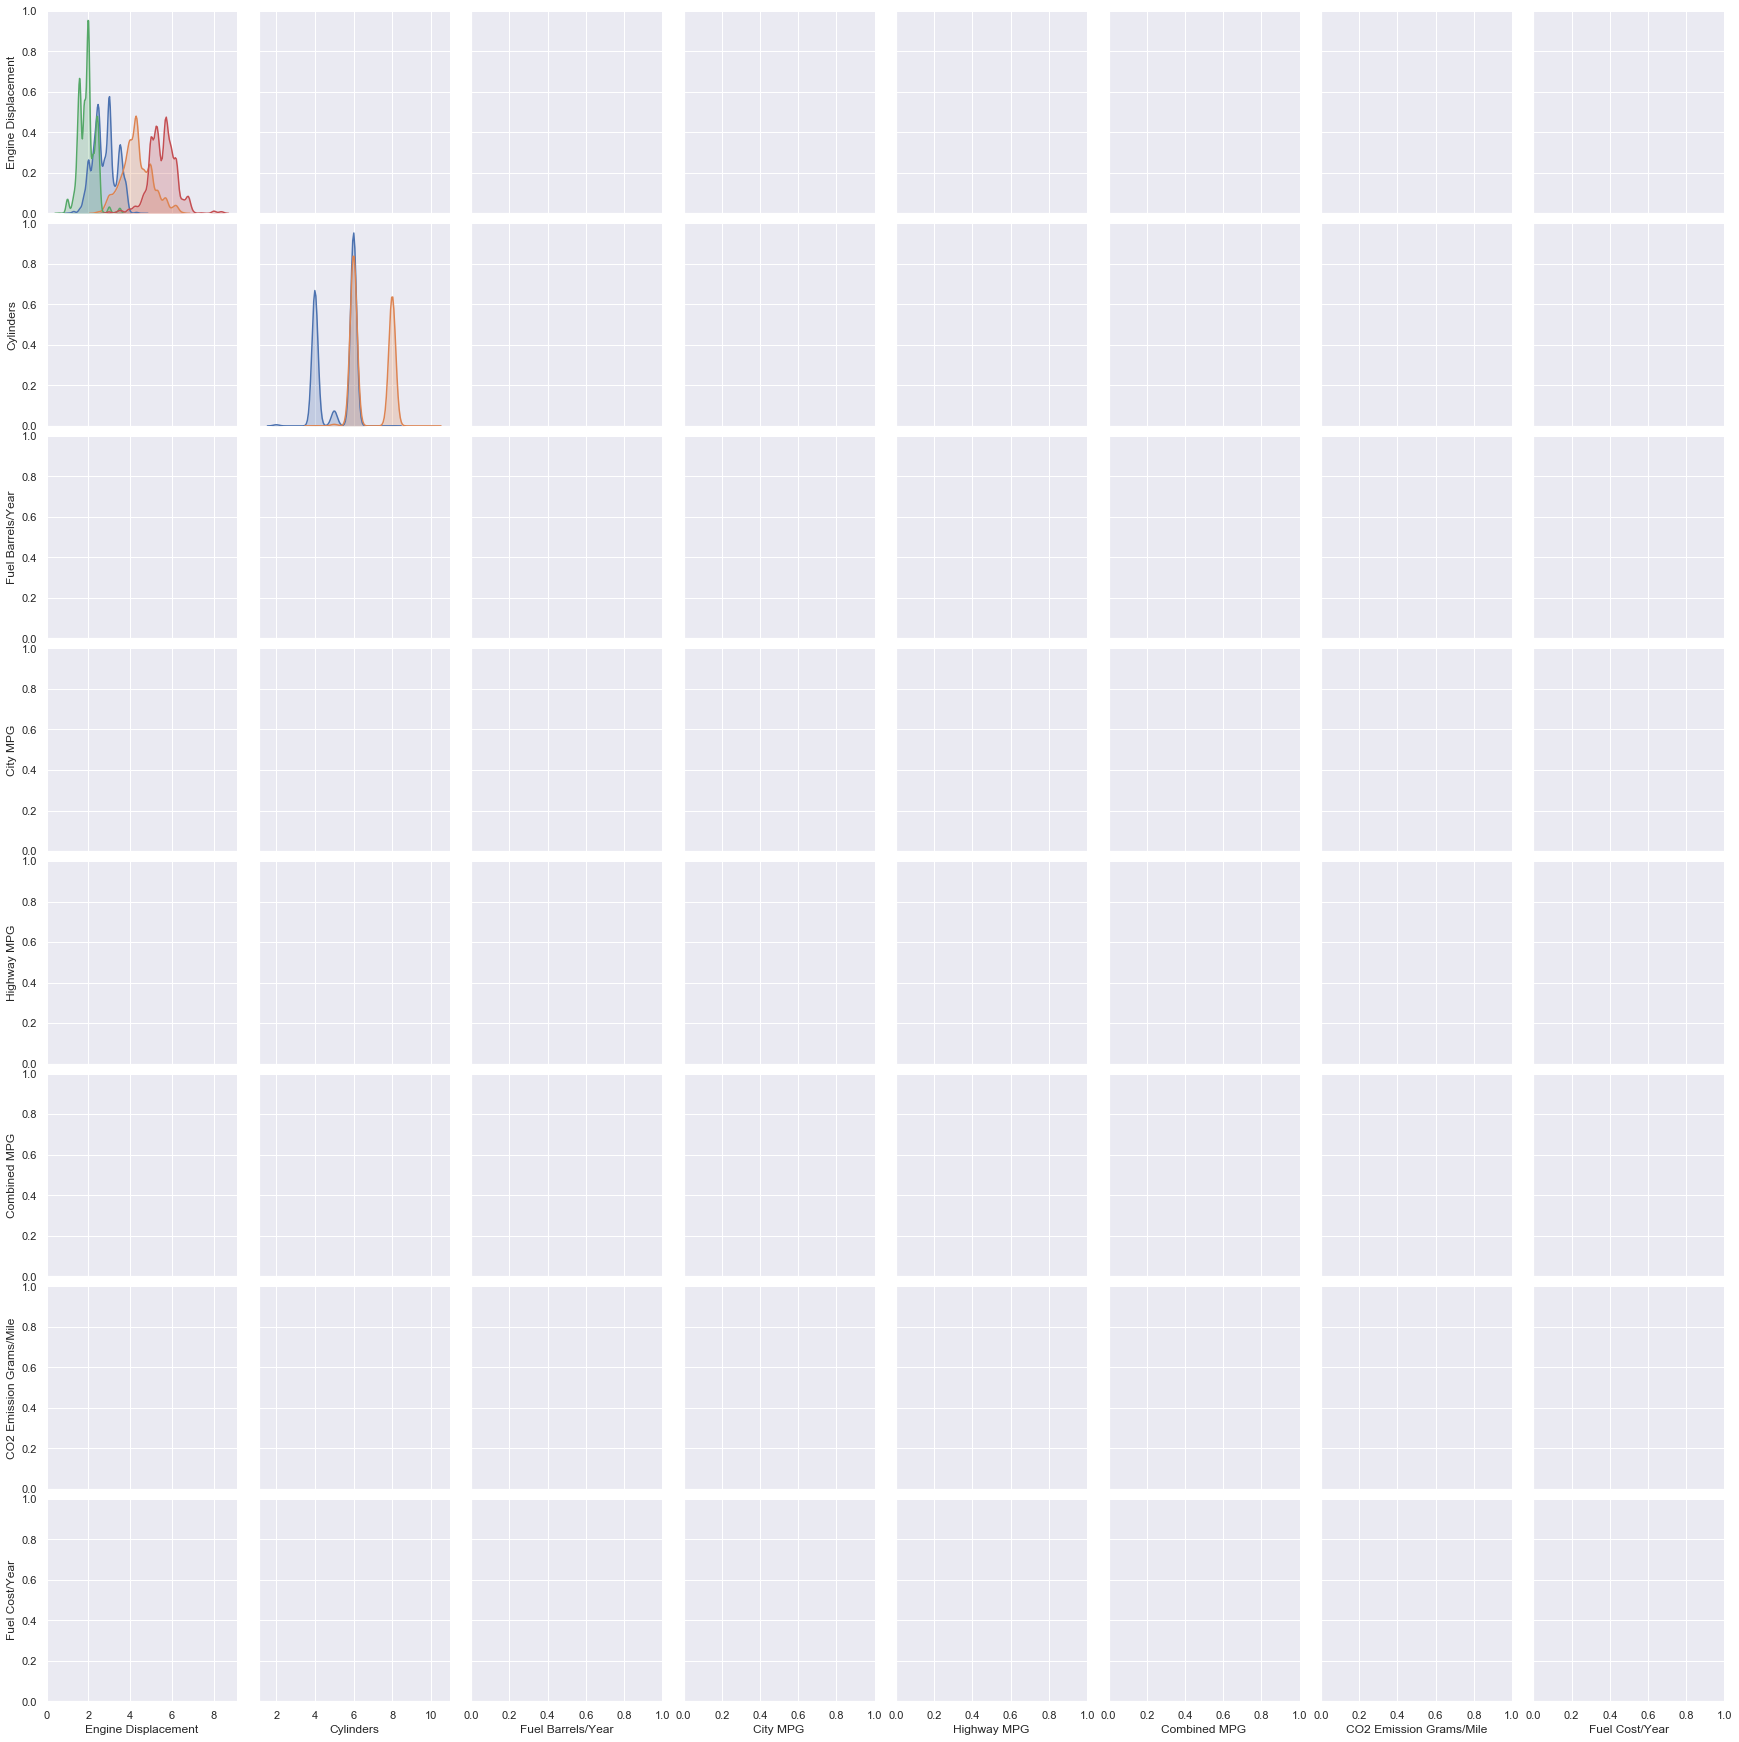

In [149]:
select_columns = ['Engine Displacement','Cylinders','Fuel Barrels/Year',
                   'City MPG','Highway MPG','Combined MPG',
                   'CO2 Emission Grams/Mile', 'Fuel Cost/Year', 'Cluster Name']

sns.pairplot(df_vehicles[select_columns], hue='Cluster Name', size=3)

From here, we can see that there are some strong positive linear relationships in our data, such as the correlations between the MPG fields, and also among the fuel cost, barrels, and CO2 emissions fields. There are also some negative exponential relationships in there as well, particularly between the MPG fields and engine displacement, fuel cost, barrels, and emissions. Additionally, we can also get a sense of the size of our clusters, how they are distributed, and the level of overlap we have between them.

Once we have this high-level overview, we can zoom in on anything that we think looks interesting. For example, let's take a closer look at Engine Displacement plotted against Combined MPG. 

In [ ]:
sns.lmplot('Engine Displacement', 'Combined MPG', data=df_vehicles, 
           hue='Cluster Name', size=8, fit_reg=False)

In addition to being able to see that there is a negative exponential correlation between these two variables, we can see that our Small Very Efficient cluster resides in the upper left, followed by our Midsized Balanced cluster that looks smaller and more compact than the others. After that, we have our Large Moderately Efficient cluster and finally our Large Inefficient cluster on the bottom right.

We can also see that there are a few red points at the very top left and a few purple points at the very bottom right that we may want to investigate further to get a sense of what types of vehicles we are likely to see at the extremes. Try identifying some of those on your own by filtering the data set like we did earlier in the post. While you're at it, try creating additional scatter plots that zoom in on other numerical field combinations from the scatter matrix above. There are a bunch of other insights to be found in this data set, and all it takes is a little exploration!